## Done By:
### Abhinandan S-211EC167
### M N Vishnu- 211EC229
### S Lakshmi Narayana- 211EC267

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

In [2]:
"""
A class to model rectangles(tiles) of a layout.
The rectangle contains parameters such as coordinates of corners and ID.
"""
class Block:
    def __init__(self, rect_ID, w, h, x, y):
        self.rect_ID = rect_ID  # ID of the rectangle
        self._w = w  # The width of rectangle.
        self._h = h  # The height of rectangle.
        self._x = x  # The x coordinate of centre the rectangle.
        self._y = y  # The y coordinate of centre the rectangle.
        self.update_coordinates()

    #To automatically update x and y values of corners if centre is changed.
    @property
    def w(self):
        return self._w

    @w.setter
    def w(self, value):
        self._w = value
        self.update_coordinates()

    @property
    def h(self):
        return self._h

    @h.setter
    def h(self, value):
        self._h = value
        self.update_coordinates()

    @property
    def x(self):
        return self._x

    @x.setter
    def x(self, value):
        self._x = value
        self.update_coordinates()

    @property
    def y(self):
        return self._y

    @y.setter
    def y(self, value):
        self._y = value
        self.update_coordinates()

    def update_coordinates(self):
        self.x1 = self.x - (self.w) / 2  # The x coordinate of leftmost point of rectangle
        self.x2 = self.x + (self.w) / 2  # The x coordinate of rightmost point of rectangle
        self.y1 = self.y - (self.h) / 2  # The y coordinate of leftmost point of rectangle
        self.y2 = self.y + (self.h) / 2  # The y coordinate of rightmost point of rectangle

In [3]:
  """
  A function read() to read a file which has parameters of all rectangle tiles.
  File MUST HAVE parameters of one rectangle per line enclosed in  curly braces.

  INPUT: Name of the file in format of string.
  OUTPUT: List of parameters of rectangles as object of class.
  Variables Used:

  -> filename: Input name of the file as string.
  -> f: file pointer.
  -> data: list of lines present in the file.
  -> line: Temporary variable.
  -> w: Connectivity matrix
  -> rect: Parameters of rectangle
  -> polish_expr
  """
def read(filename):
  # Obtain pointer to the file and read the data in file
    f=open(filename,'r')
    data=f.readlines()

    #To get value of n
    n=int(data[0][2])

    #To extract each line
    lines = [(x.strip().strip('{').strip('}')) for x in data][2:]

    #Connectivity matrix
    w=[]
    for i in range(n):
        w.append([int(num) for num in lines[i].split()])
    lines=lines[n+1:]

    #Parameters of rectangle
    rect=[]
    for i in range(n):
        rect.append([int(num) for num in lines[i].split()])
    lines=lines[n+1:]
    tiles=[]  #Empty list to store objects of the class block
    for r in rect:
      #creating object of the class block and appending it to list
      tiles.append(Block(r[0],r[1],r[2],0,0))

    #Polish expression
    polish_expr=[i for i in lines[0].split()]

    # Return List of rectangles as array of objects of class,connectivity matrix,polish expression
    return tiles,w,polish_expr

#Function Call
filename="test_data.txt"
tiles,connectivity_matrix,polish_expr=read(filename)
cpy=polish_expr.copy()
t_cpy=tiles.copy()

In [4]:
"""
A function plot_layout() to draw the rectangles given the parameters.
Input: Array of objects of class block where each object represents a rectangle
          with its parameters.
Output: Visual plot of all the rectangles and boundary with ID written at centre.
        Returns an object of class block which has parameters of boundary

Variables used
-> tiles: input array of object.
-> fig, ax: figure and axis to plot the subplots.
-> xmin: The bottom left x coordinate of the boundary.
-> ymin: The bottom left y coordinate of the boundary.
-> xmax: The top right x coordinate of the boundary.
-> xmax: The top right y coordinate of the boundary.
-> x_list: List of x values to be plotted.
-> y_list: List of y values to be plotted.
"""
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_layout(tiles,title=None,boundaries=None,x_list=None,y_list=None):
  # Create a subplot.
  fig, ax = plt.subplots()

  if not boundaries:
    # To find coordinates of boundary
    xmin=min(t.x1 for t in tiles) # minimum  of all the bottom left x coordinates
    ymin=min(t.y1 for t in tiles) # minimum  of all the bottom left y coordinates
    xmax=max(t.x2 for t in tiles) # maximum  of all the top right x coordinates
    ymax=max(t.y2 for t in tiles) # maximum  of all the top right y coordinates

    #Set the limits of x axis and y axis
    ax.set_xlim(xmin-1, xmax+1)
    ax.set_ylim(ymin-1, ymax+1)

    # Plot the boundary
    ax.add_patch(Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,edgecolor='orange',
                          facecolor='none', lw=3))

  # if boundary is already given
  else:
    # Plot the boundary
    ax.set_xlim(boundaries.x1-1,boundaries.x2+1)
    ax.set_ylim(boundaries.y1-1,boundaries.y2+1)

    ax.add_patch(Rectangle((boundaries.x1,boundaries.y1),
                           boundaries.x2-boundaries.x1,
                           boundaries.y2-boundaries.y1,edgecolor='orange',
                           facecolor='none',lw=3))
  # Plot all the rectangles
  for t in tiles:
    # Draw rectangle
    ax.add_patch(Rectangle((t.x1, t.y1), t.w, t.h,alpha=0.5,
                          edgecolor='black', facecolor="#%06x"%random.randint(0,0xFFFFFF),lw=1.5))

    # Label the rectangle
    ax.annotate(t.rect_ID, (t.x , t.y) ,color='black', weight='bold',
                ha='center', va='center')

  if x_list:
    for i in x_list:
        ax.axvline(x=i,linestyle="--", color="orange",alpha=0.5)
  if y_list:
    for i in y_list:
        ax.axhline(y=i,linestyle="--", color="blue",alpha=0.5)
  # Display the plot
  plt.title(title)
  plt.show()
  if not boundaries:
    # Return the parameters of the boundary as an object.
    return Block("Boundary",xmin,ymin,xmax,ymax)
  else:
    return


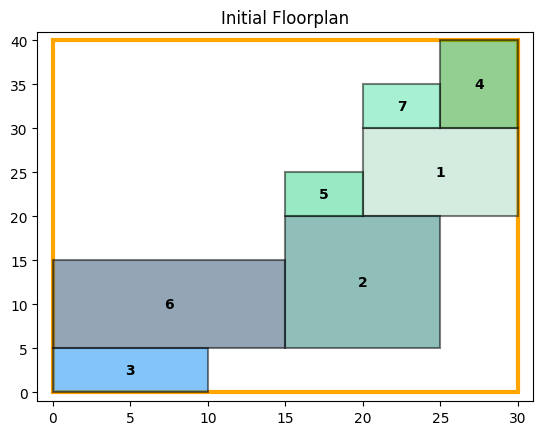

In [5]:
'''
A function placement3() to place the tiles according to the polish expression
and find exact x and y coordinates of each block according to the floor plan.
inputs: array of object of tiles and polish expression.

output: Updated x and y value of tiles and dimension of bounding rectangle.

Variables used:
stack-> to store polish expression.
flag,Origin, first_time, t2,t1,i-> Control variables and iteration variables.
ret-> bounding rectangle of given two blocks.
res-> Main block located at origin to which other blocks are attached.
store1-> A dictionary which has key as a bounding rectangle and value as all the
            primary blocks enclosed in that bounding rectangle.
store2-> A List containing blocks(primary or smaller bounding rectangles) which
            has not yet been attached to the main block.
X-> Rightmost x coordinate of Main block.
Y-> Topmost y coordinate of Mainblock.
'''
def placement3(tiles1,polish_expr1):
    # Initialize Variables
    stack = []
    operators = {'V', 'H'}
    X,Y=0,0
    origin=True
    first_time=True
    store2=[]
    store1={}
    flag=1

    if polish_expr1:        #To check if polish expression exists.
        #postfix Evaluation
        if len(polish_expr1) == 1: return (polish_expr1[0])
        for p in polish_expr1:
            if p not in operators:
                stack.append(tiles1[int(p)-1]) #If it is an operand
            else:
                #Pop 2 elements from stack
                t2 = stack.pop()
                t1 = stack.pop()
                ret=None
                if p == 'V': #If verticle cut
                    wid=t1.w+t2.w   #width is sum of widths.
                    hei=max(t1.h,t2.h) #height is maximum of heights.
                        #Compute x and y locations inside bounding block kept at origin
                    t1.x=(t1.w)/2
                    t2.x=wid-(t2.w)/2
                    t1.y=t1.h/2
                    t2.y=t2.h/2
                        # For case where a bounding rectangle is placed in right of partition
                        # Add x offsets to all rectangles blocks in that bounding block.
                    if t2 in store1 and not t1 is res :
                        if len(store1[t2])!=0:
                            for i in store1[t2]:
                                i.x=i.x+(wid-(t2.w)/2)-t2.w/2


                elif p == 'H': #If Horizontal cut
                    wid=max(t1.w,t2.w)  #width is maximum of widths.
                    hei=t1.h+t2.h       #height is sum of heights.
                        #Compute x and y locations inside bounding block kept at origin
                    t1.x=(t1.w)/2
                    t2.x=(t2.w)/2
                    t1.y=t1.h/2
                    t2.y=hei-t2.h/2
                        # For case where a bounding rectangle is placed in top of partition
                        # Add y offsets to all rectangles blocks in that bounding block.
                    if t2 in store1 and not t1 is res:
                        if len(store1[t2])!=0:
                            for i in store1[t2]:
                                i.y=i.y+(hei-t2.h/2)-t2.h/2

                ret=Block(0,wid,hei,wid/2,hei/2) # Create object for bounding rectangle

                #To store all primary rectangles in the bounding block
                store1[ret]=[]
                if t1.rect_ID!=0:
                    store1[ret].append(t1)
                else:
                    store1[ret]+=store1[t1]
                if t2.rect_ID!=0:
                    store1[ret].append(t2)
                else:
                    store1[ret]+=store1[t2]
                # To check if block is added to Main building block.
                if not first_time:
                    if t2==res:
                        origin=True
                        flag=2
                    elif t1==res:
                        origin=True
                        flag=1
                    else:
                        origin=False
                #if blocks are added to Main block(res)
                if origin:
                    res=ret
                    if p=='V': # For verticle cut
                    #Add X offsets to all primary blocks placed at right.
                        if flag==1:
                            if t2 in store1:
                                for i in store1[t2]:
                                    i.x=i.x+X
                        if flag==2:
                            if t1 in store1:
                                for i in store1[t1]:
                                    i.x=i.x+t1.w

                    elif p=='H':    # For Horizontal cut
                     #Add Y offsets to all primary blocks placed at top.
                        if  flag==1:
                            if t2 in store1:
                                for i in store1[t2]:
                                    i.y=i.y+Y
                        if flag==2:
                            if t1 in store1:
                                for i in store1[t1]:
                                    i.y=i.y+t1.h
                    #Update X and Y values.
                    X=res.x2
                    Y=res.y2
                first_time=False
                stack.append(ret) # Append the bounding rectangle to stack.
        #print(polish_expr1)
        return stack.pop(), store1,tiles1

#Function Call
t_cpy=tiles.copy()
initial, covering_blocks,t_cpy = placement3(t_cpy,cpy)
plot_layout(t_cpy,"Initial Floorplan")

In [6]:
''' This function calculates the cost of the placement of the tiles.
    Cost is calculated as 0.25 * wire_length + 0.75 * area
    where wire_length is the sum of the product of the half perimeter distance between the tiles and the number of wires between the blocks which is given in the connectivity matrix.
    area is the minimum rectangle that bounds all blocks.
    Input: object of class Block which represents minimum rectangle that bounds all blocks, list of tiles, connectivity matrix
    Output: cost of the placement '''

def cost(placements,tiles5,connectivity_matrix):
    cost = 0
    wire_length = 0
    #Calculate Area.
    area = placements.w * placements.h

    #Calculate wirelength
    for i in range(len(connectivity_matrix[0])):
        for j in range(len(connectivity_matrix[0])):
            if i < j:
                tile1 = None
                tile2 = None

                for tile in tiles5:
                    if tile.rect_ID == i:
                        tile1 = tile
                    if tile.rect_ID == j:
                        tile2 = tile
                if tile1 and tile2:
                    wire_length += ( np.abs(tile1.x - tile2.x) +np.abs( tile1.y - tile2.y )) * connectivity_matrix[i][j]
    #Calculate Cost
    cost = 0.25 * wire_length + 0.75 * area
    return cost
#Function call to get initial Cost.
ini_cost=cost(initial,t_cpy,connectivity_matrix)

In [7]:
'''
Function to check is a given polish expression is normalized or not
Ensures that no two consecutive entries in the expression are the same operators, VV or HH and also checks for balloting property
input:polish_expr
output:returns true is it is normalized polish expression, else false
'''
def is_normalized_polish(expression):
  operand_count= 0
  operator_count=0
  prev_operator = None

  for token in expression:
    if token in ("H", "V"):
      if token == prev_operator:  # Check for consecutive operators
        return False
      operator_count += 1
      prev_operator = token
      if operator_count >= operand_count:  # Check balloting property
        return False
    else:
      operand_count += 1
      prev_operator = None  # Reset after operand

  return operand_count > operator_count

In [8]:
'''
Function representing MOVE1(M1)
Move-Swapping two operands in the polish epression
This move always ensures that the polish expression is normalized hence we do not check for normalized polish
input:polish_expr
output:returns the polish expression after performing the move
'''
def move1(polish):
  i1=random.randint(0,len(polish)-1)
  i2=random.randint(0,len(polish)-1)
  #swap only if both are operands and neither is an operator
  if  (polish[i1]=='V' or polish[i1]=='H' or polish[i2]=='V' or polish[i2]=='H'):
    move1(polish)
  else:
    polish[i1],polish[i2]=polish[i2],polish[i1]
  return polish

In [9]:
'''
Function representing MOVE2(M2)
Move-Complementing H and V in a chain in the polish epression
This move always ensures that the polish expression is normalized hence we do not check for normalized polish
input:polish_expr
output:returns the polish expression after performing the move
'''
def move2(exprn):
    ret=exprn.copy()
    operators=["V","H"]
    str=""      #to convert polish list to string having only operators and space for operands
    for i in ret:
        if i not in operators:
            j=ret.index(i)
            ret[j]=' '
    for i in range(len(ret)):
        str+=ret[i]
    # Split the string based on spaces to get list of chain of operators.
    z=str.split()
    x = random.choice(range(len(z))) #Choose any random operator chain to complement.
    r=z[x]
    r=list(r)
    #Complement H to V and V to H.
    for i in range(len(r)):
        if r[i]=='V':
            r[i]='H'
        else:
            r[i]='V'
    r = ''.join(r)
    z[x]=r
    p=""
    #Join all the operators to a single string.
    for i in z:
        p+=i
    #replace the original polish expression with swapped operators.
    for i in range(len(exprn)):
        if exprn[i] in operators:
            exprn[i]=p[0]
            p=p[1:]
    return exprn

In [10]:
'''
Function representing MOVE3(M3)
Move-Swapping an operand and an operator in the polish epression
This move does not ensure that the polish expression is normalized, hence check for normalized polish
input:polish_expr
output:returns the polish expression after performing the move
'''
def move3(expr):
    cpy=expr.copy()
    operators=[]
    operands=[]
    for i in cpy:
        if i in ['V','H']:
            operators.append(cpy.index(i))
        else:
            operands.append(cpy.index(i))
    i1=random.choice(operators)
    i2=random.choice(operands)
    cpy[i1],cpy[i2]=cpy[i2],cpy[i1]
    #check for normalized polish
    if is_normalized_polish(cpy):
        return cpy
    else:
        return move3(expr)

In [11]:
'''
A function perturb() to perform perturbation or choose a move for simulated annealing.
inputs: Polish expression.
output: Updated polish expression after applying the move.
Using a random number between 1 to 3 to choose a move.
'''
def perturb(expr):
    r=random.choice([1,2,3])
    match r:
        case 1:     #if random number=1, then apply move1
            choose=move1(expr)
        case 2:     #if random number=2, then apply move2
            choose=move2(expr)
        case 3:     #if random number=3, then apply move3
            choose=move3(expr)
        case _:
            return
    return choose

Initial Cost before SA is =  1013.125
['3', '6', '2', '5', '1', '7', '4', 'H', 'V', 'H', 'V', 'H', 'V']
Cost= 886.875


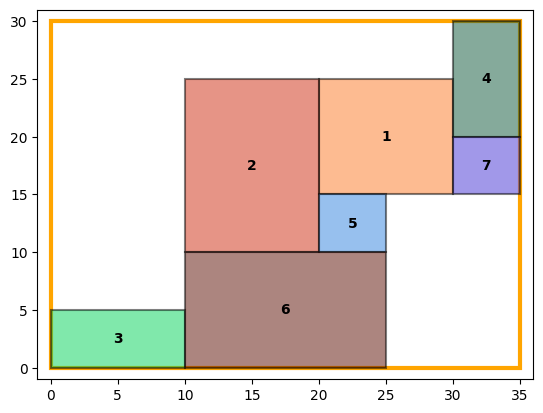

['3', '6', '2', '5', '1', '7', '4', 'V', 'H', 'V', 'H', 'V', 'H']
Cost= 1013.125


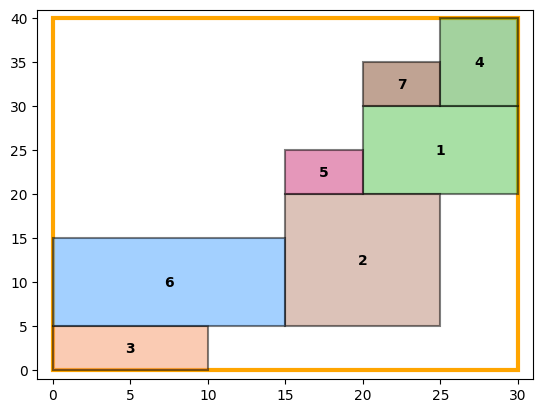

['3', '6', '2', 'H', '1', '7', '4', 'V', '5', 'V', 'H', 'V', 'H']
Cost= 766.875


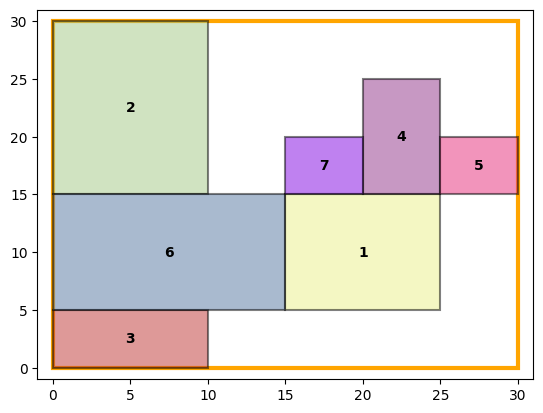

['3', '6', '5', 'H', '1', '7', '4', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 893.125


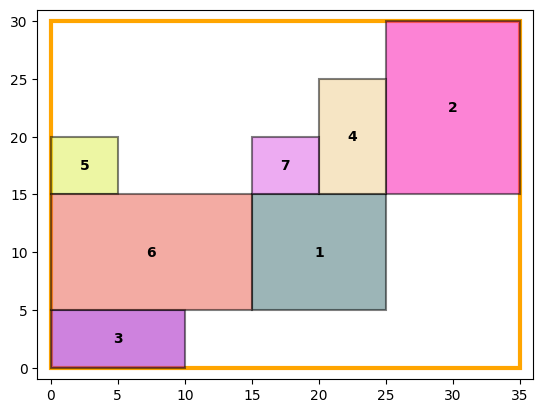

['6', '3', '5', 'H', '1', '7', '4', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 881.875


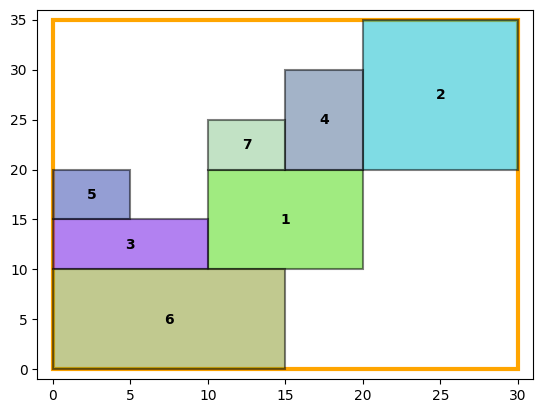

['6', '3', '5', '7', '1', 'H', '4', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 884.375


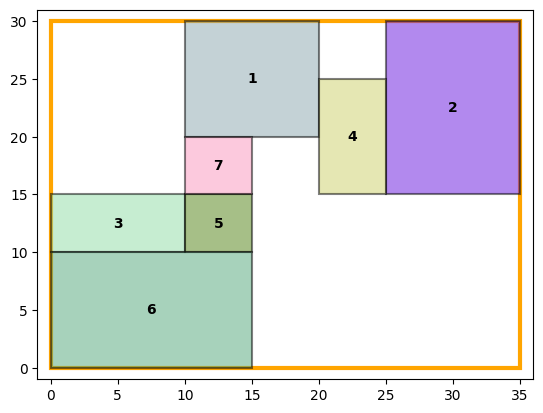

['6', '3', 'H', '7', '1', '5', '4', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 838.125


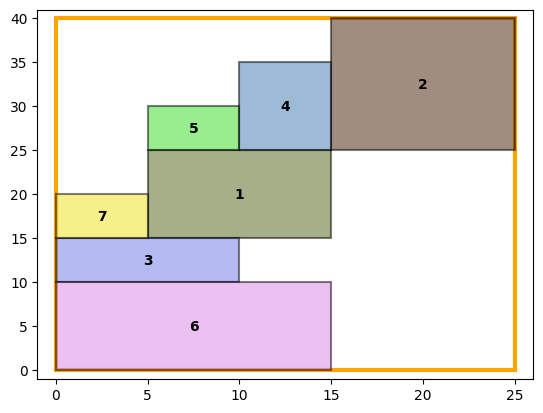

['6', '3', 'H', '7', '1', '4', '5', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 838.125


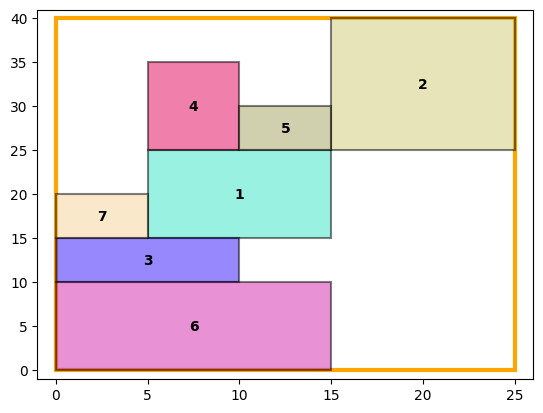

['6', '3', 'V', '7', '1', '4', '5', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 746.875


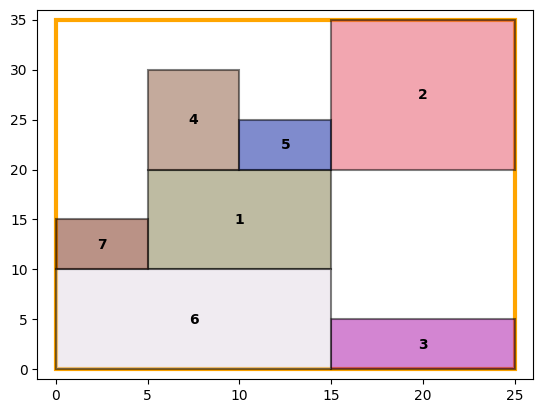

['1', '3', 'V', '7', '6', '4', '5', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 743.125


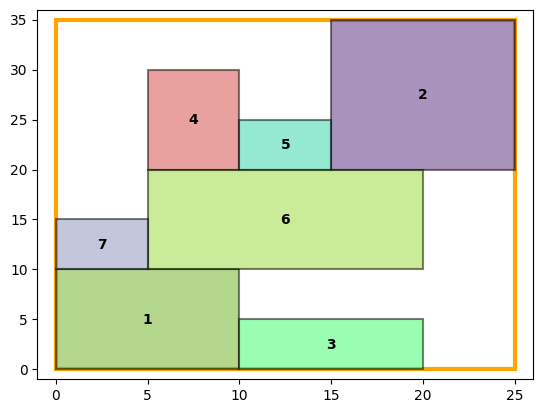

['4', '3', 'V', '7', '6', '1', '5', 'V', '2', 'V', 'H', 'V', 'H']
Cost= 884.375


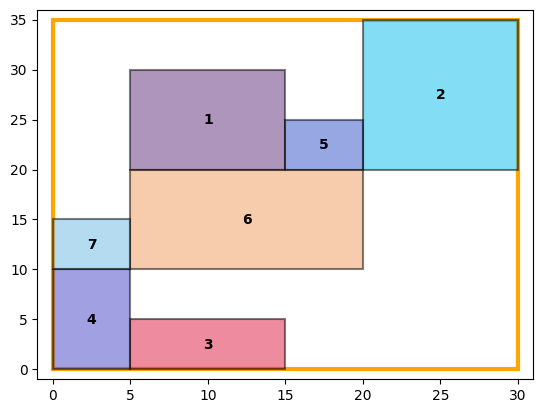

['2', '3', 'V', '7', '6', '1', '5', 'V', '4', 'V', 'H', 'V', 'H']
Cost= 753.125


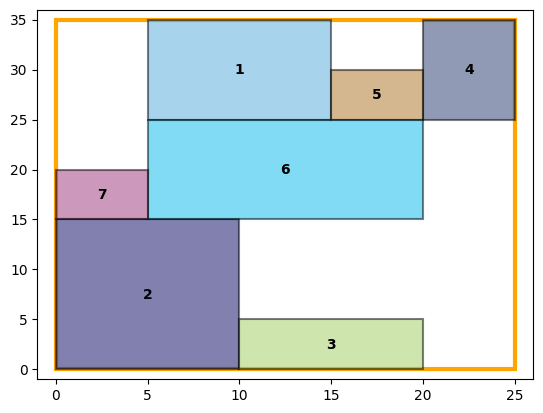

['6', '3', 'V', '7', '2', '1', '5', 'V', '4', 'V', 'H', 'V', 'H']
Cost= 755.625


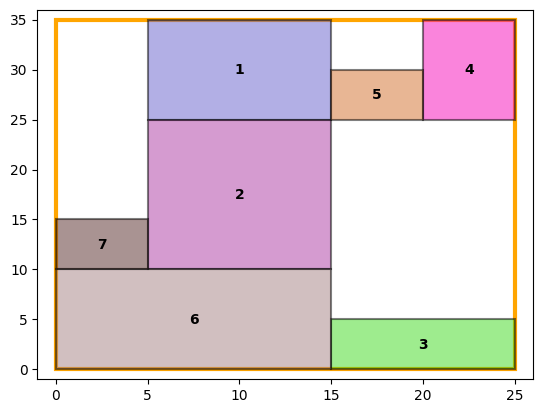

['6', '3', 'V', '7', '2', '1', '5', 'V', '4', 'H', 'V', 'H', 'V']
Cost= 1049.375


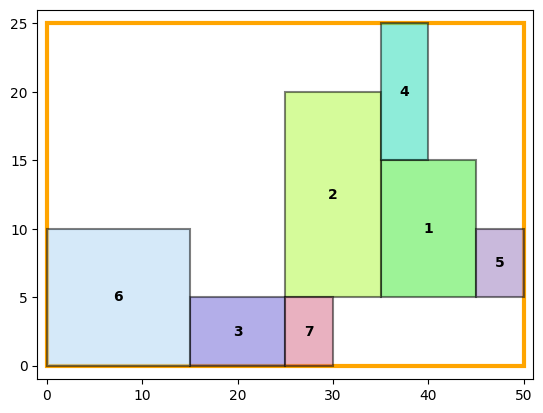

['6', '3', 'V', '7', '2', '1', '5', 'H', '4', 'H', 'V', 'H', 'V']
Cost= 1123.125


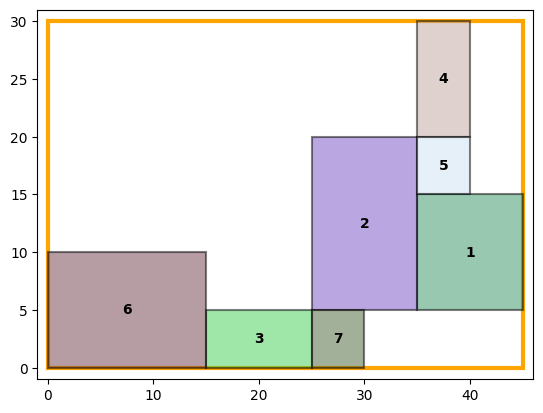

['6', '3', 'V', '7', 'H', '1', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 1155.625


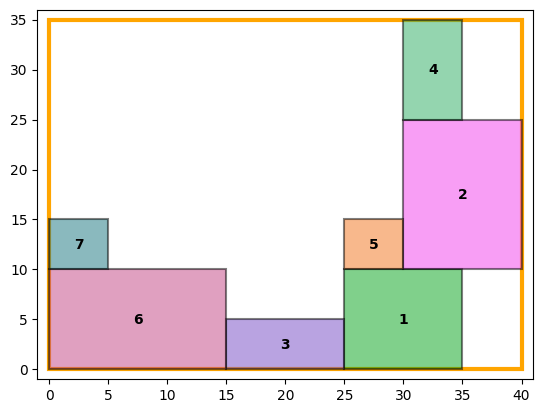

['6', '3', '1', '7', 'H', 'V', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 1159.375


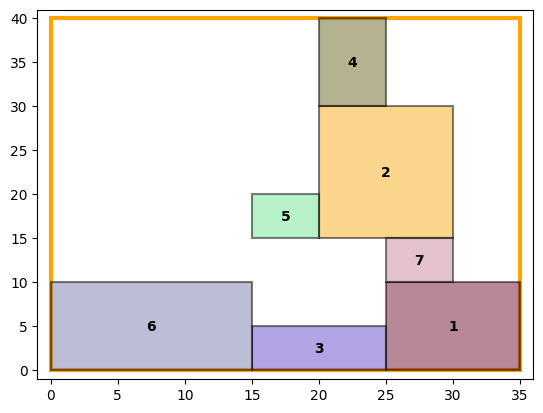

['6', '3', '1', '7', 'H', 'V', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 1159.375


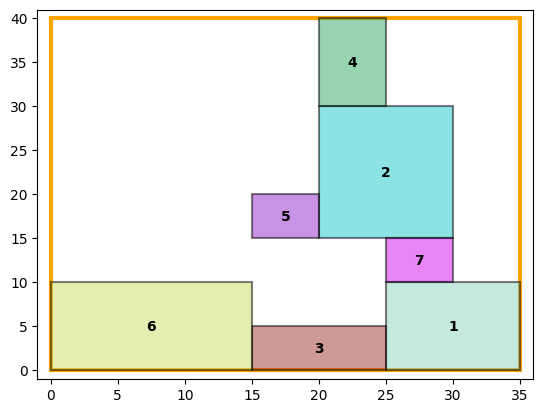

['6', '3', '1', '7', 'V', 'H', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 994.375


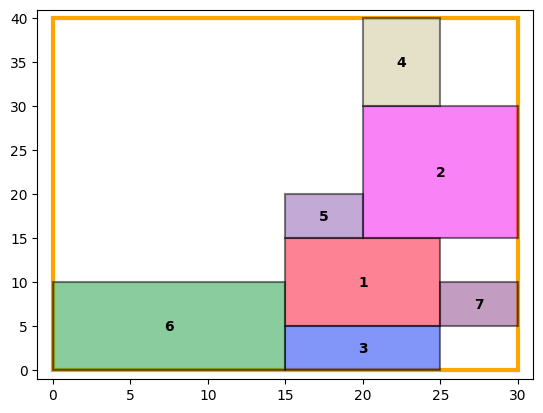

['6', '3', '1', 'V', '7', 'H', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 1159.375


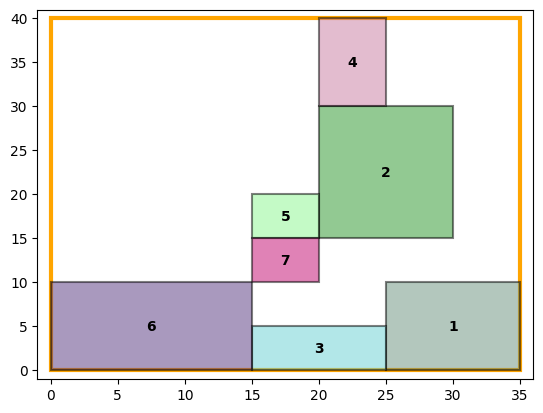

['6', '3', '1', 'H', '7', 'H', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 1120.625


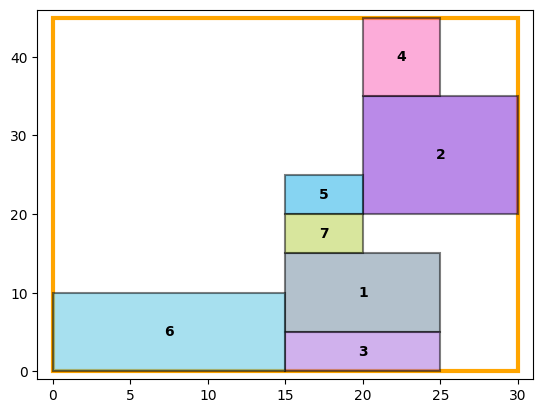

['6', '3', '1', 'H', '7', 'H', '5', 'V', '4', 'H', '2', 'H', 'V']
Cost= 1118.125


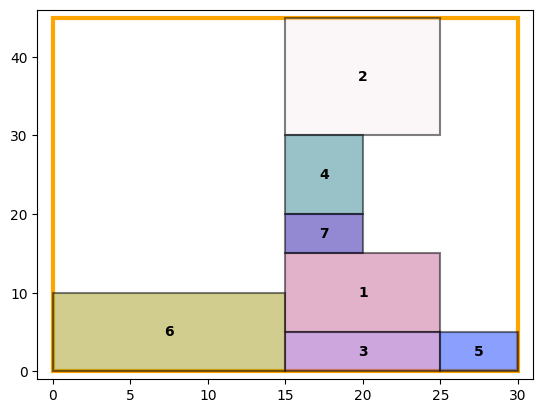

['6', '3', '1', 'H', '7', 'H', '5', '2', '4', 'H', 'V', 'H', 'V']
Cost= 1120.625


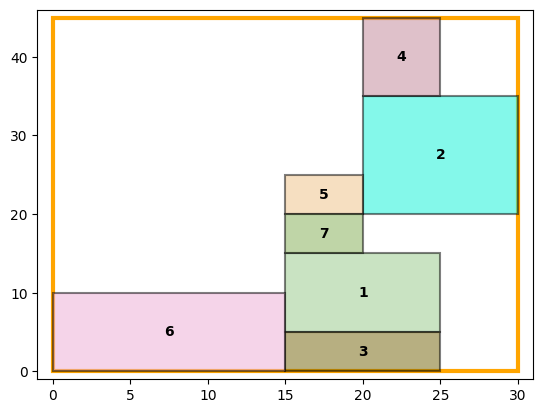

['6', '3', '1', 'H', '2', 'H', '5', '7', '4', 'H', 'V', 'H', 'V']
Cost= 950.625


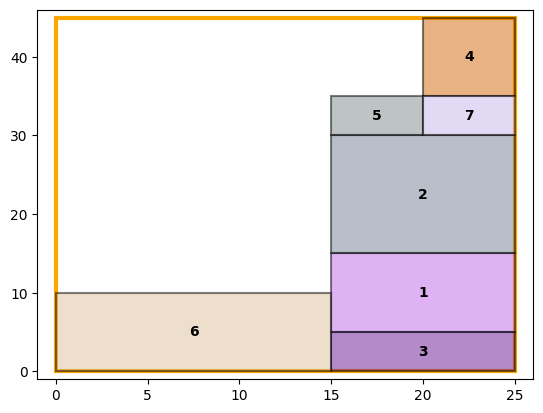

['6', '3', '5', 'H', '2', 'H', '1', '7', '4', 'H', 'V', 'H', 'V']
Cost= 1008.125


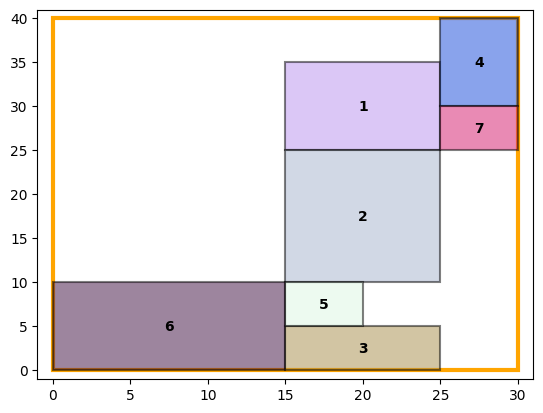

['6', '3', '5', 'H', '2', 'H', '1', '7', '4', 'V', 'H', 'V', 'H']
Cost= 603.125


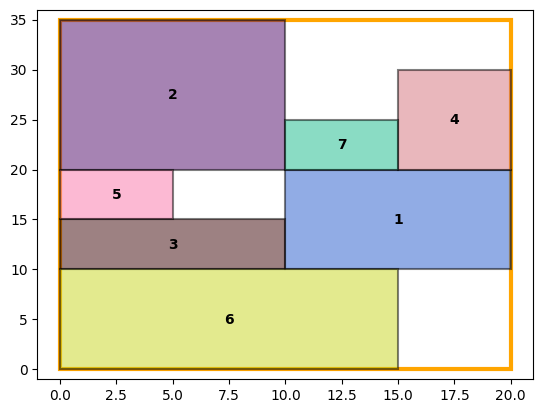

['6', '3', '5', 'H', '2', 'H', '1', '7', 'V', '4', 'H', 'V', 'H']
Cost= 729.375


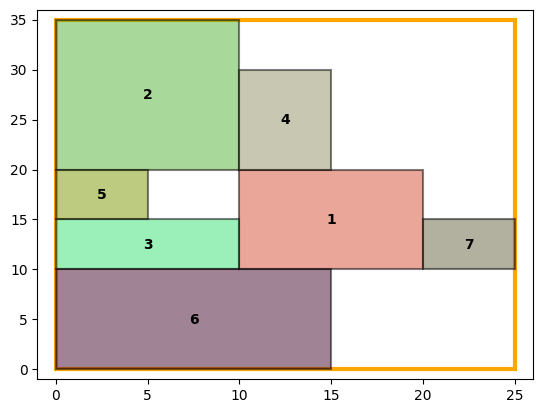

['6', '3', '7', 'H', '2', 'H', '1', '5', 'V', '4', 'H', 'V', 'H']
Cost= 736.875


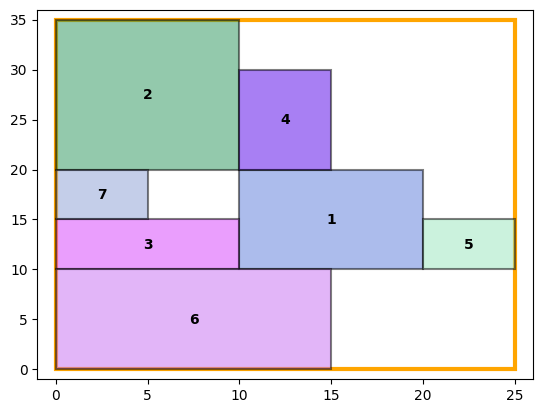

['6', '3', '7', 'V', '2', 'H', '1', '5', 'V', '4', 'H', 'V', 'H']
Cost= 761.875


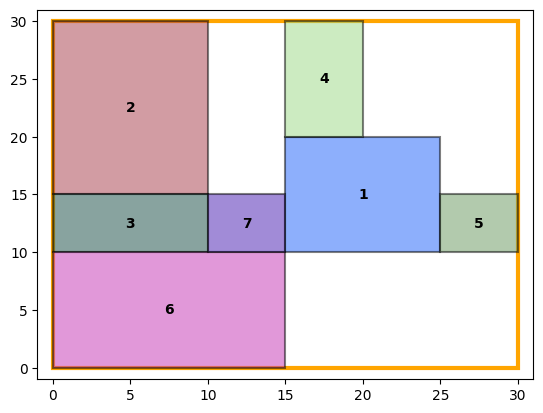

['6', '3', '7', 'V', '2', 'V', '1', '5', 'V', '4', 'H', 'V', 'H']
Cost= 1004.375


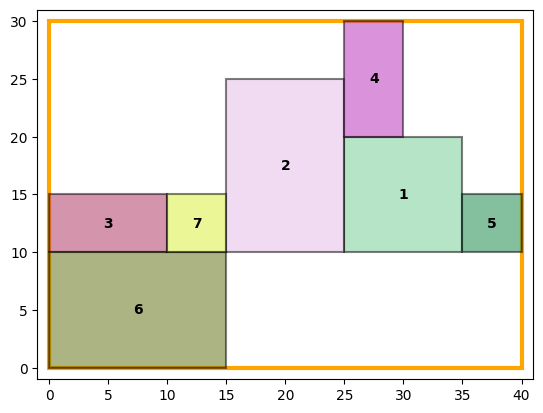

['6', '7', '3', 'V', '2', 'V', '1', '5', 'V', '4', 'H', 'V', 'H']
Cost= 998.125


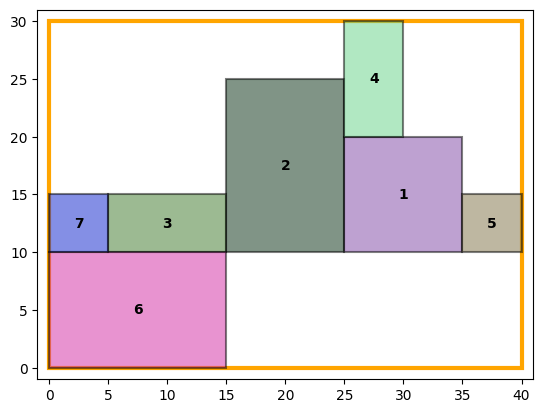

['6', '7', '3', 'V', '2', 'V', '1', '5', 'V', 'H', '4', 'V', 'H']
Cost= 883.125


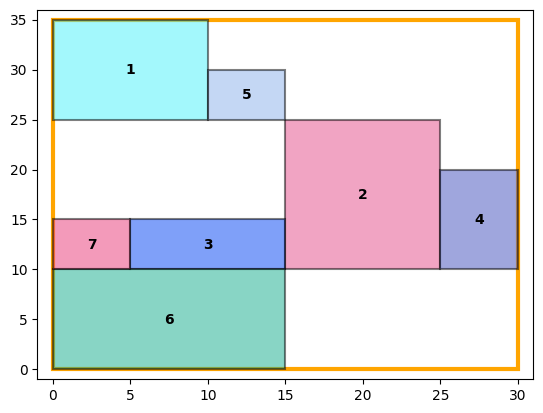

['6', '7', '3', 'V', '2', 'V', '1', '5', 'V', 'H', '4', 'H', 'V']
Cost= 1156.875


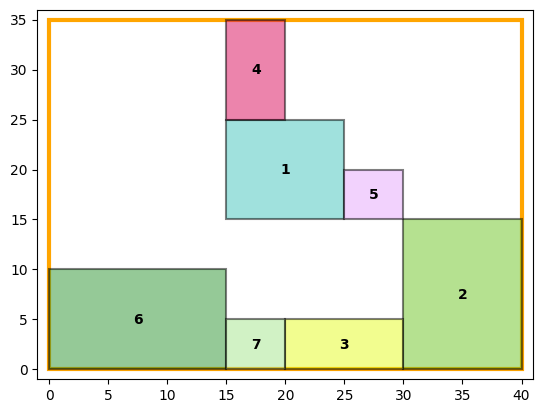

['6', '7', 'V', '3', '2', 'V', '1', '5', 'V', 'H', '4', 'H', 'V']
Cost= 1154.375


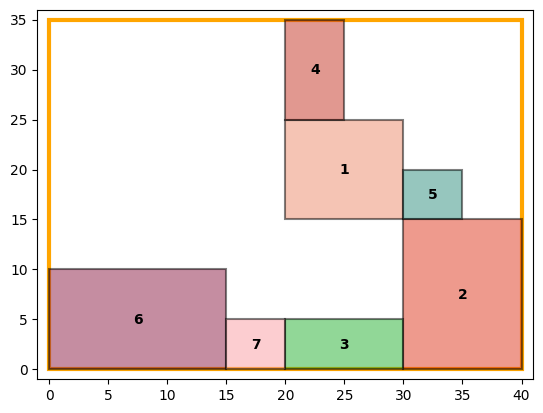

['6', '7', '3', 'V', '2', 'V', '1', '5', 'V', 'H', '4', 'H', 'V']
Cost= 1156.875


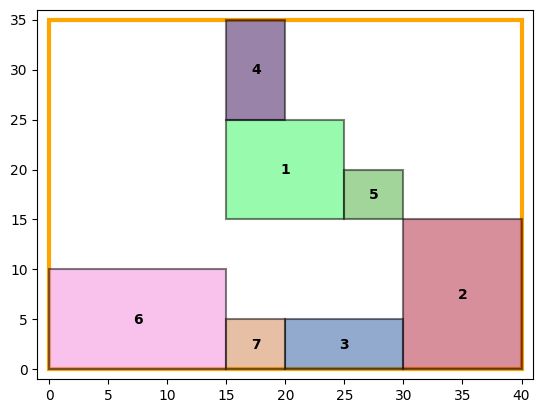

['6', '7', '3', 'V', '2', 'V', '1', 'H', 'V', '5', '4', 'H', 'V']
Cost= 958.125


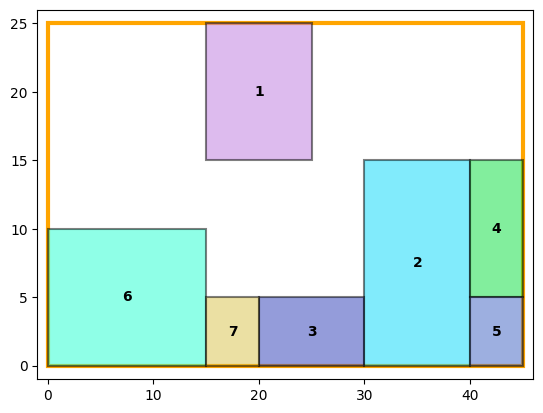

['6', '7', '3', 'V', '2', 'V', '1', 'H', 'V', '5', '4', 'H', 'V']
Cost= 958.125


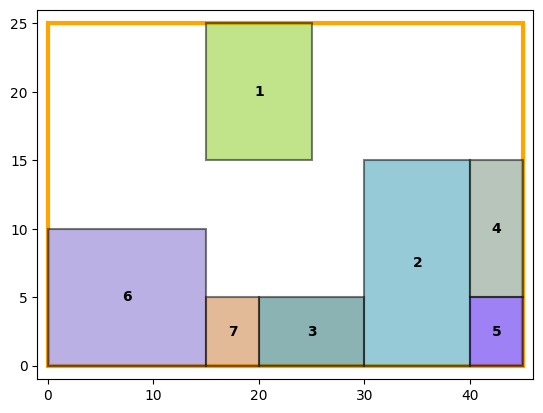

['6', '7', '3', 'V', '2', 'V', 'H', '1', 'V', '5', '4', 'H', 'V']
Cost= 851.875


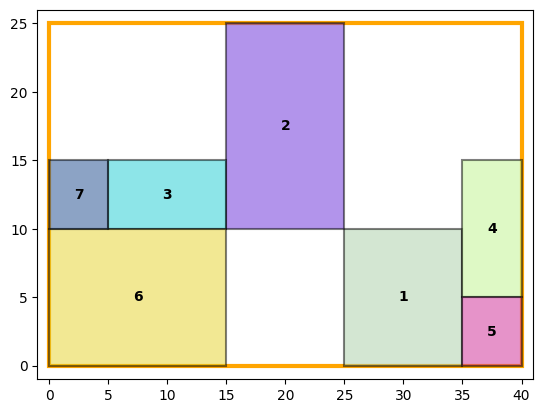

['6', '7', '4', 'V', '2', 'V', 'H', '1', 'V', '5', '3', 'H', 'V']
Cost= 843.125


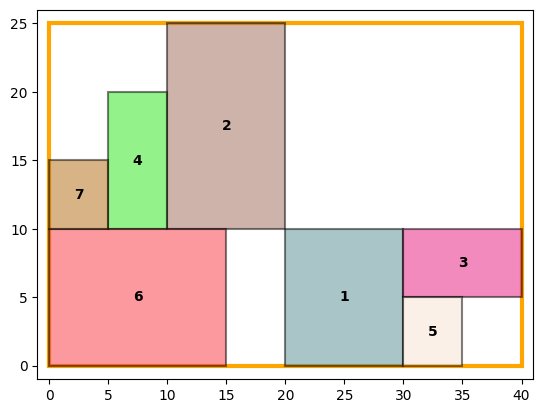

['3', '7', '4', 'V', '2', 'V', 'H', '1', 'V', '5', '6', 'H', 'V']
Cost= 770.625


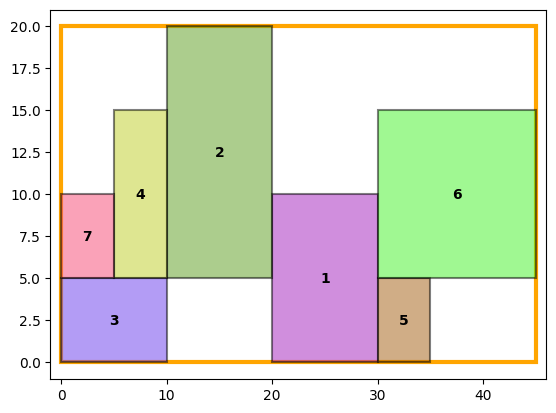

['3', '7', '4', '6', '2', 'V', 'H', '1', 'V', '5', 'V', 'H', 'V']
Cost= 1253.125


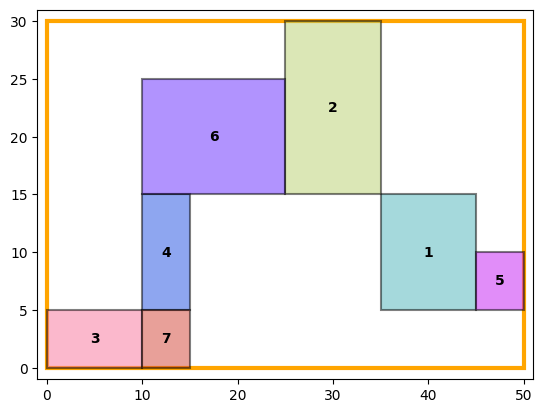

['3', '7', '4', '6', '2', 'V', 'H', '1', 'H', '5', 'V', 'H', 'V']
Cost= 1335.625


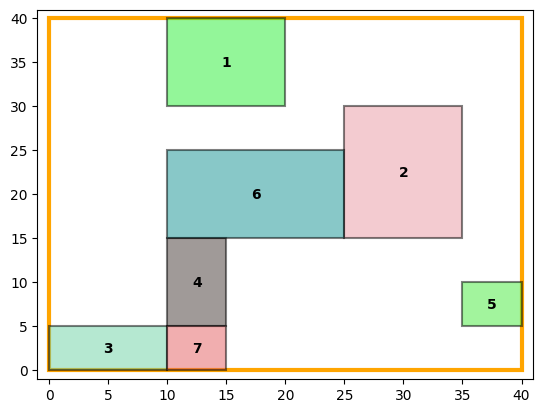

['3', '7', '4', '6', '2', 'V', 'H', '1', 'V', '5', 'V', 'H', 'V']
Cost= 1253.125


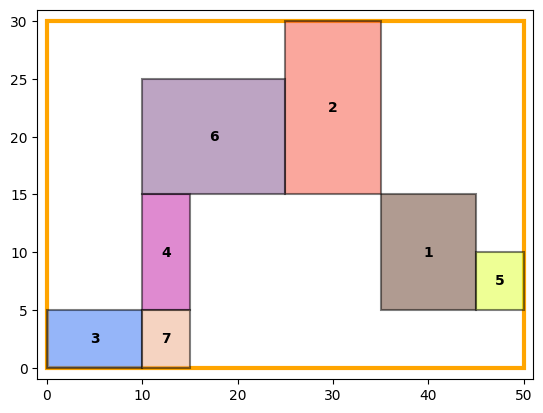

['3', '7', '4', '6', 'H', 'V', '2', '1', 'V', '5', 'V', 'H', 'V']
Cost= 1028.125


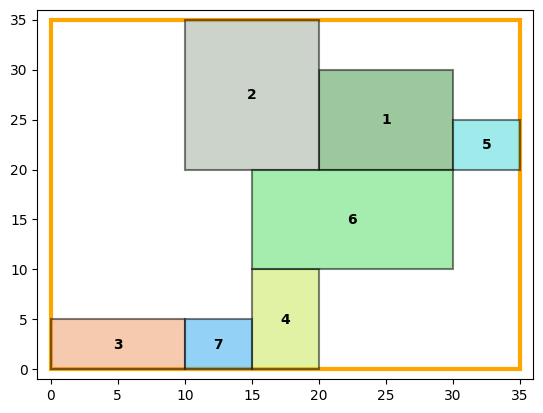

['3', '7', '4', '6', 'H', 'V', '2', '1', 'V', '5', 'H', 'V', 'H']
Cost= 856.875


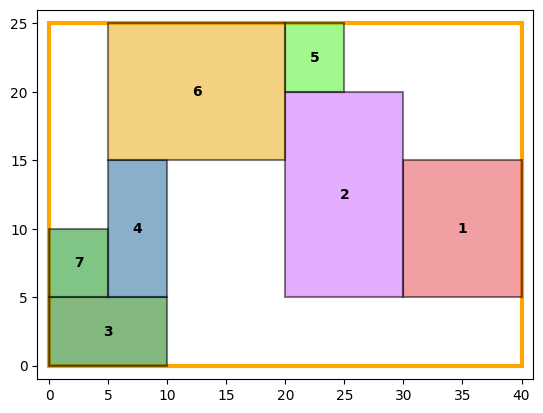

['3', '7', '4', '6', 'H', 'V', '1', '2', 'V', '5', 'H', 'V', 'H']
Cost= 854.375


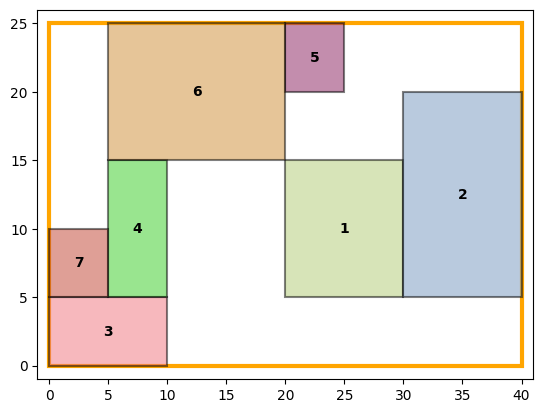

['3', '7', '4', '6', 'H', '1', 'V', '2', 'V', '5', 'H', 'V', 'H']
Cost= 1014.375


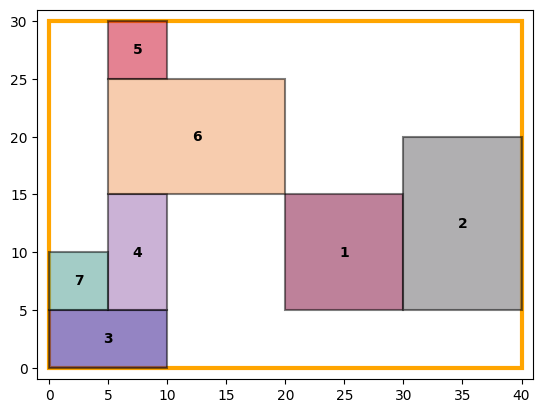

['3', '7', '5', '6', 'H', '1', 'V', '2', 'V', '4', 'H', 'V', 'H']
Cost= 1004.375


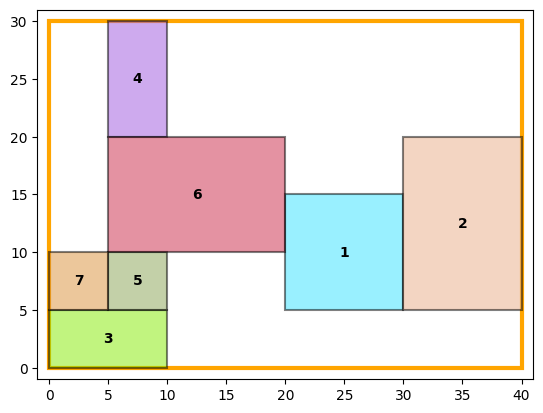

['3', '7', '5', '6', 'H', '4', 'V', '2', 'V', '1', 'H', 'V', 'H']
Cost= 881.875


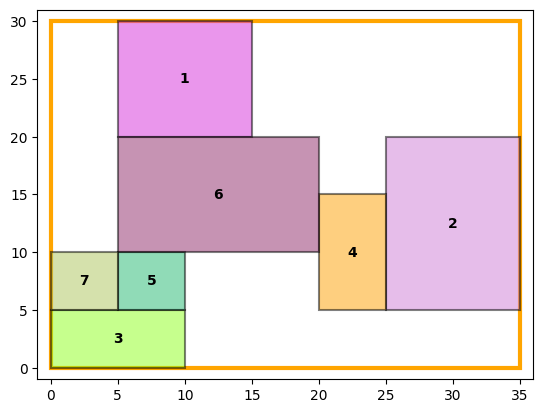

['7', '3', '5', '6', 'H', '4', 'V', '2', 'V', '1', 'H', 'V', 'H']
Cost= 994.375


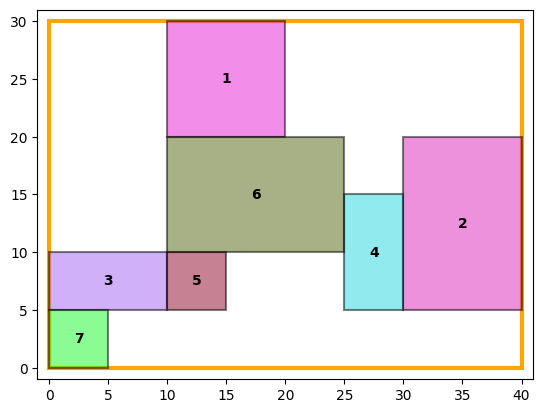

['7', '3', '5', 'H', '6', '4', 'V', '2', 'V', '1', 'H', 'V', 'H']
Cost= 1000.625


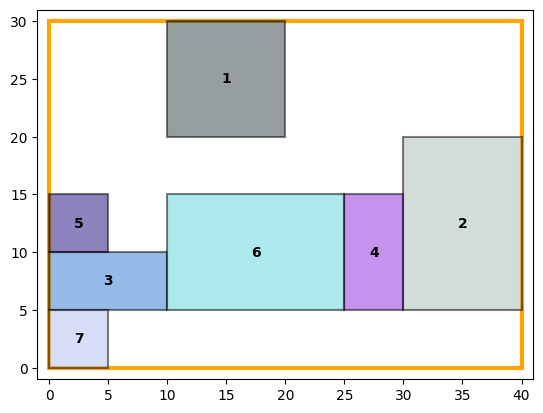

['7', '3', '5', 'V', '6', '4', 'V', '2', 'V', '1', 'H', 'V', 'H']
Cost= 1116.875


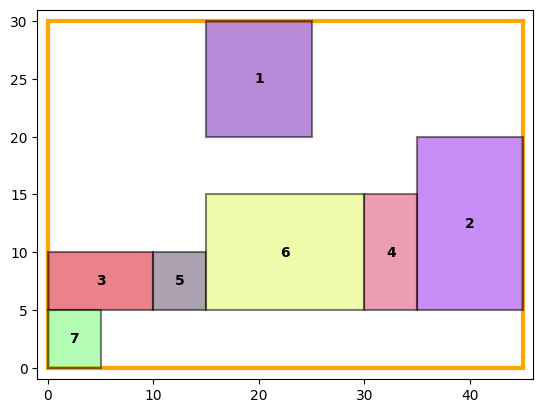

['7', '3', '5', 'V', '6', '4', 'V', '2', 'V', 'H', '1', 'V', 'H']
Cost= 840.625


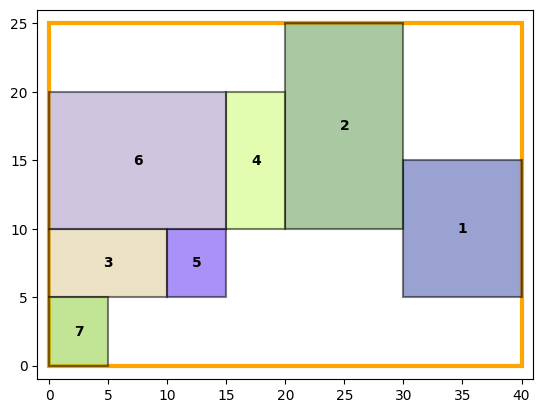

['7', '3', '5', 'V', 'H', '4', 'V', '2', 'V', '6', '1', 'V', 'H']
Cost= 645.625


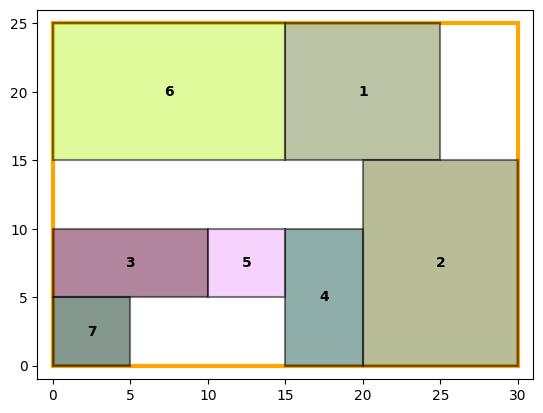

['7', '3', '5', 'V', 'H', '1', 'V', '2', 'V', '6', '4', 'V', 'H']
Cost= 741.875


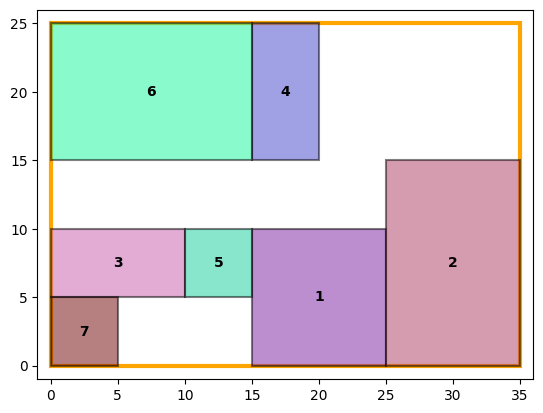

['7', '3', '5', 'V', '2', '1', 'V', 'H', 'V', '6', '4', 'V', 'H']
Cost= 641.875


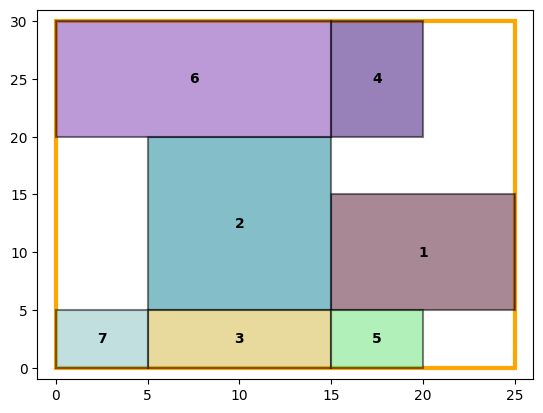

['7', '3', '5', 'V', '2', '1', 'H', 'V', 'H', '6', '4', 'V', 'H']
Cost= 860.625


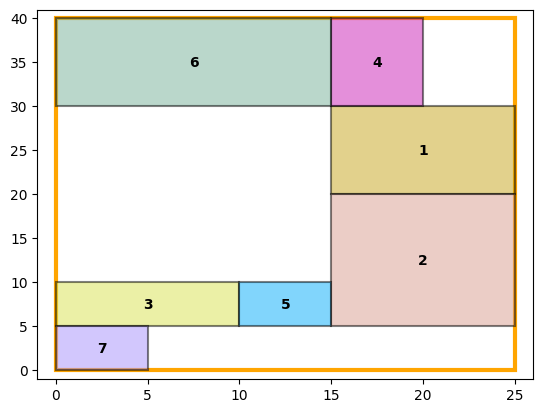

['7', '6', '5', 'V', '2', '1', 'H', 'V', 'H', '3', '4', 'V', 'H']
Cost= 1011.875


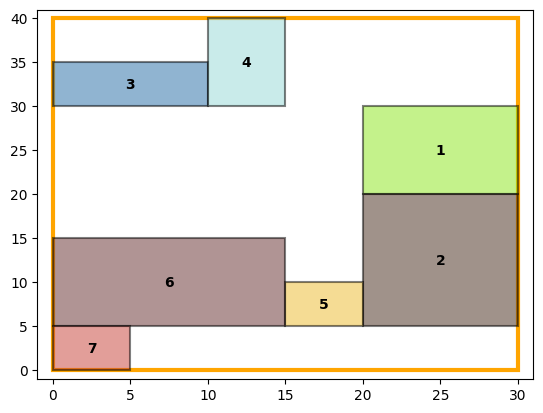

['7', '6', '5', '3', '2', '1', 'H', 'V', 'H', 'V', '4', 'V', 'H']
Cost= 1156.875


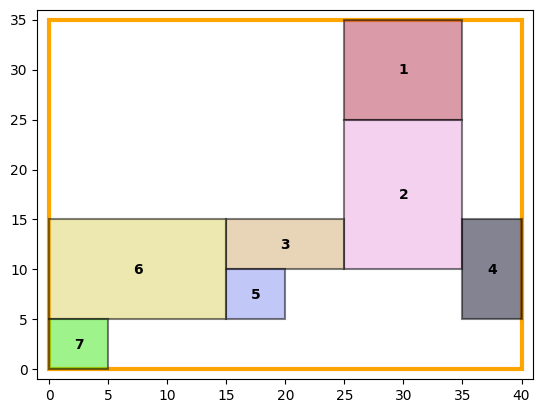

['7', '6', '5', '3', '2', '1', 'V', 'H', 'V', 'H', '4', 'V', 'H']
Cost= 876.875


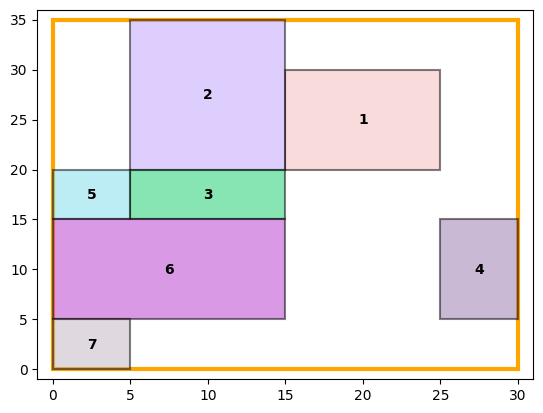

['7', '6', '5', '3', '2', '1', 'V', 'H', 'V', 'H', '4', 'H', 'V']
Cost= 990.625


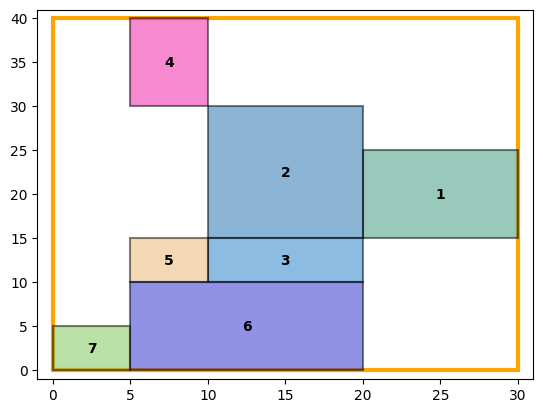

['7', '6', '5', '3', 'V', '1', '2', 'H', 'V', 'H', '4', 'H', 'V']
Cost= 1120.625


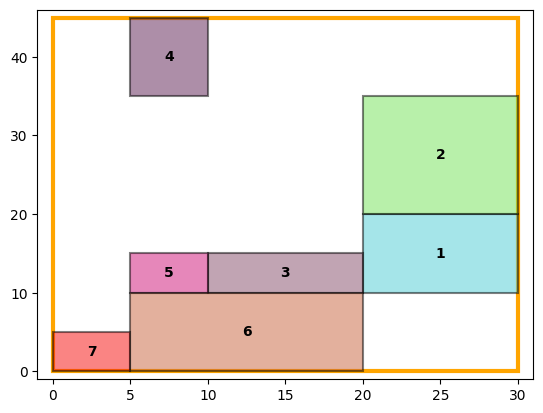

['4', '6', '5', '3', 'V', '1', '2', 'H', 'V', 'H', '7', 'H', 'V']
Cost= 994.375


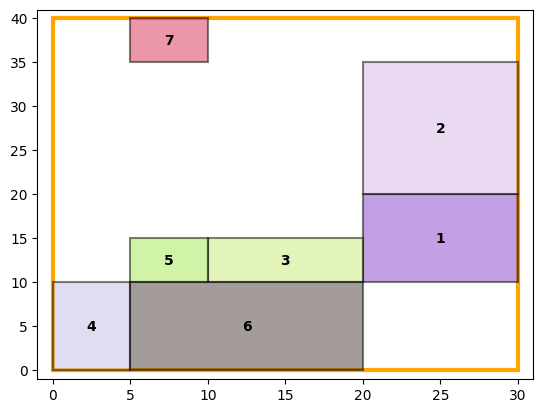

['4', '6', 'V', '3', '5', '1', '2', 'H', 'V', 'H', '7', 'H', 'V']
Cost= 1010.625


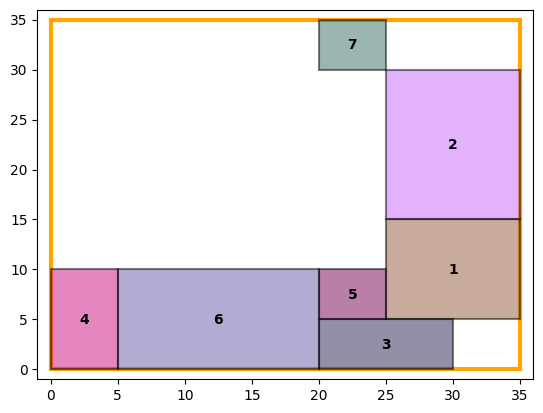

['4', '6', 'V', '3', 'H', '1', '2', '5', 'V', 'H', '7', 'H', 'V']
Cost= 883.125


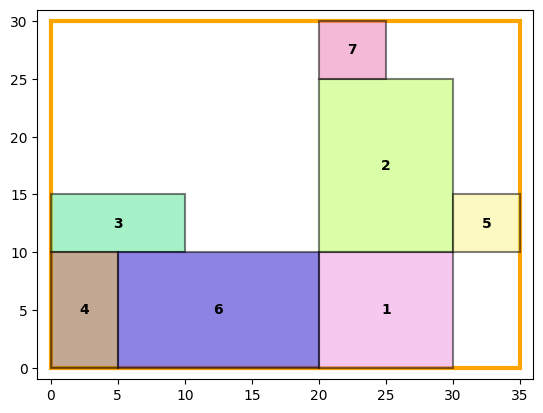

['4', '6', 'V', '3', 'H', '1', '2', '5', 'H', 'V', '7', 'H', 'V']
Cost= 854.375


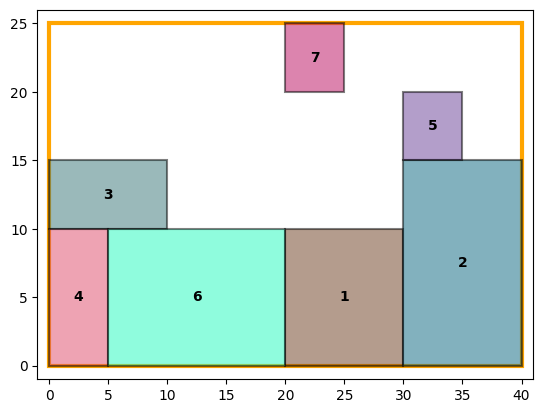

['2', '6', 'V', '3', 'H', '1', '4', '5', 'H', 'V', '7', 'H', 'V']
Cost= 706.875


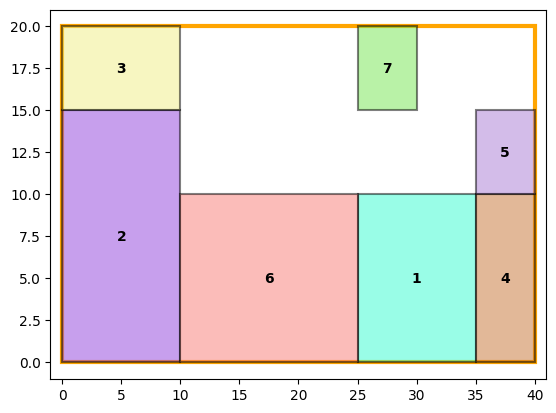

['2', '6', 'V', '3', 'H', '1', '4', '5', 'V', 'H', '7', 'H', 'V']
Cost= 751.875


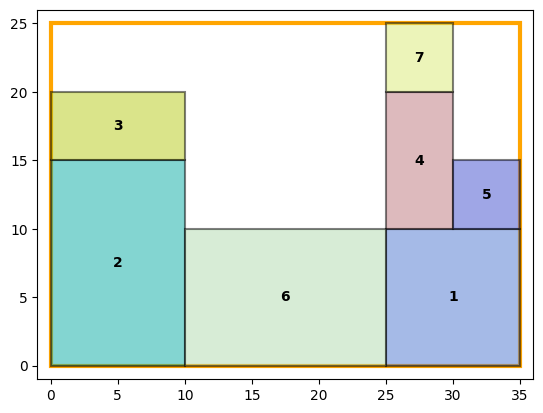

['2', '6', '1', '3', 'H', 'V', '4', '5', 'V', 'H', '7', 'H', 'V']
Cost= 873.125


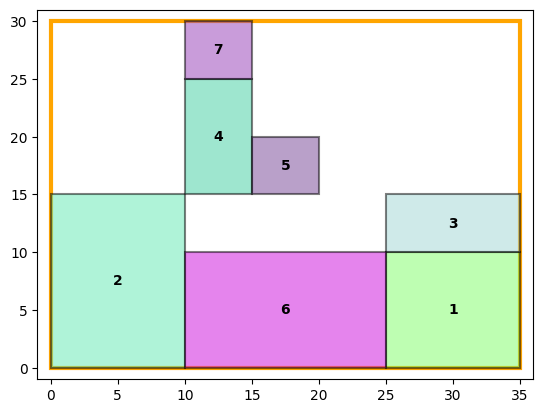

['2', '6', '1', '3', '4', 'V', 'H', '5', 'V', 'H', '7', 'H', 'V']
Cost= 868.125


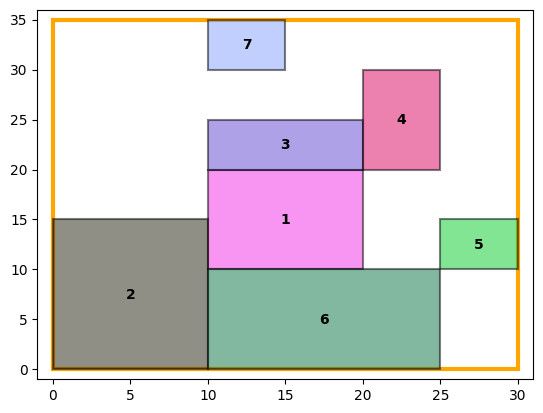

['2', '6', '1', '3', '5', 'V', 'H', '4', 'V', 'H', '7', 'H', 'V']
Cost= 751.875


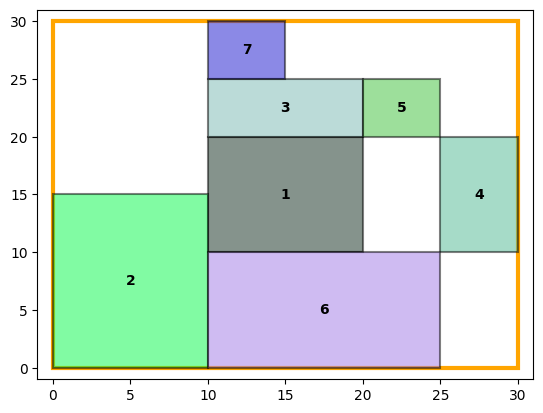

['2', '6', '1', '3', '5', 'H', 'V', '4', 'V', 'H', '7', 'H', 'V']
Cost= 730.625


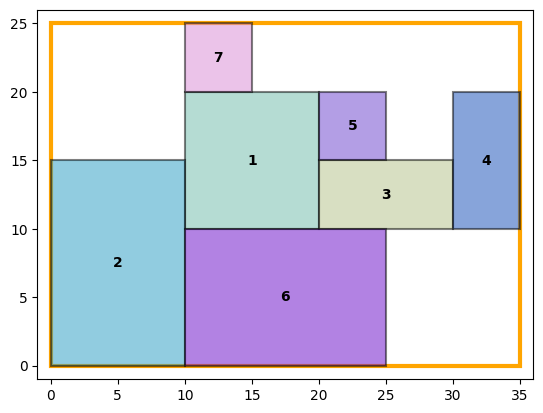

['2', '6', '1', '3', '5', 'H', 'V', '4', 'H', 'V', '7', 'H', 'V']
Cost= 930.625


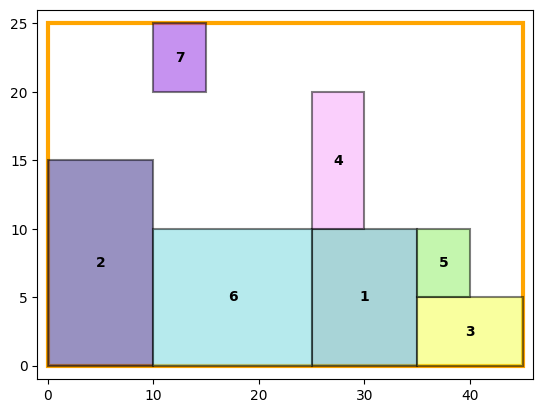

['2', '7', '1', '3', '5', 'H', 'V', '4', 'H', 'V', '6', 'H', 'V']
Cost= 875.625


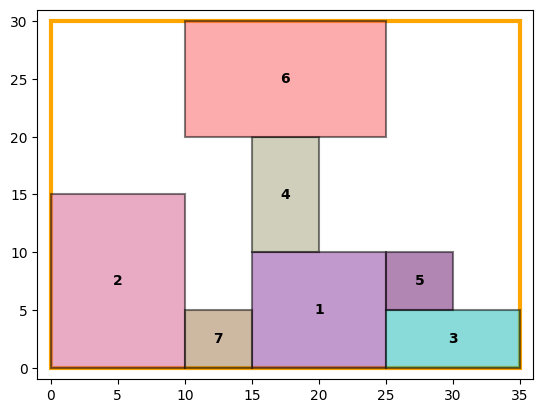

['2', '7', '1', '3', '5', 'V', 'H', '4', 'H', 'V', '6', 'H', 'V']
Cost= 873.125


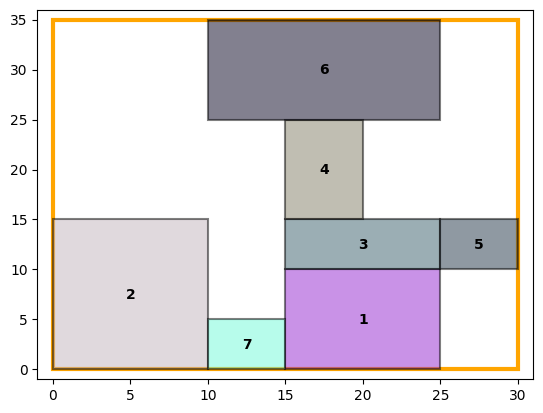

['2', '7', '1', '3', '5', 'V', 'H', '4', 'H', 'V', '6', 'V', 'H']
Cost= 1141.875


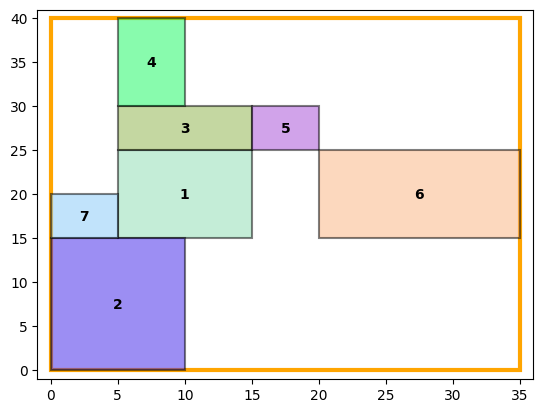

['2', '6', '1', '3', '5', 'V', 'H', '4', 'H', 'V', '7', 'V', 'H']
Cost= 1139.375


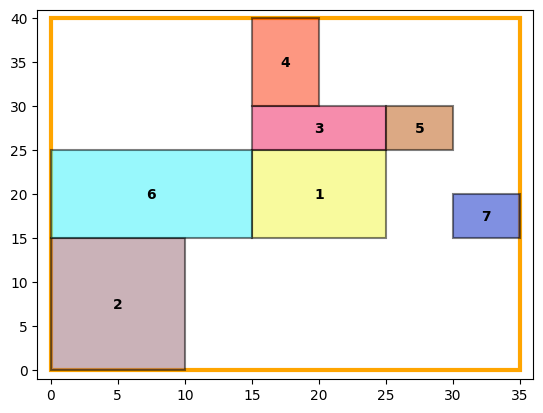

['2', '6', '7', '3', '5', 'V', 'H', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1144.375


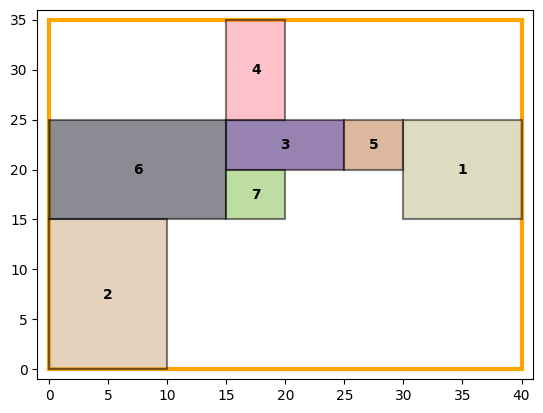

['5', '6', '7', '3', '2', 'V', 'H', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1310.625


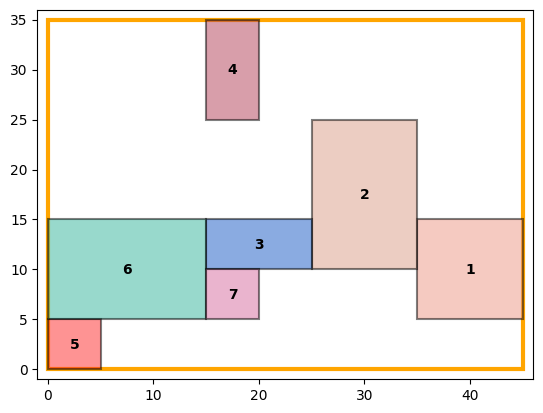

['5', '6', '7', '3', '2', 'V', 'H', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1310.625


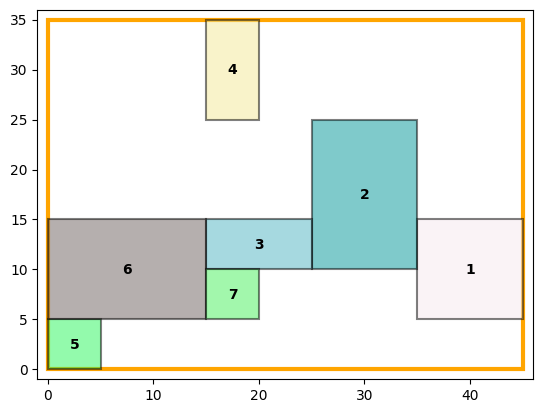

['5', '6', '7', '3', 'V', '2', 'H', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1164.375


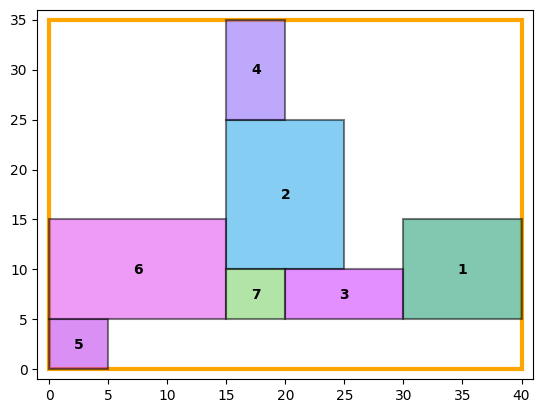

['5', '6', '7', '2', 'V', '3', 'H', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1170.625


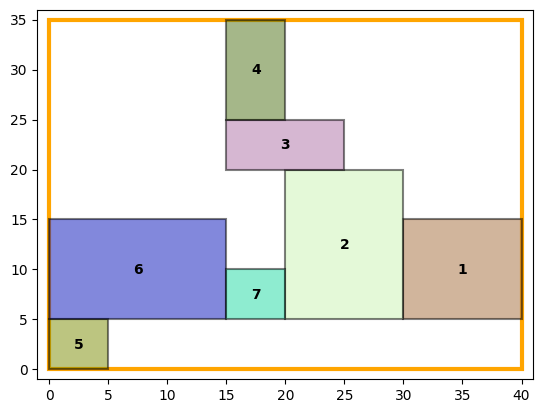

['5', '6', '7', '2', 'V', '3', 'V', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1253.125


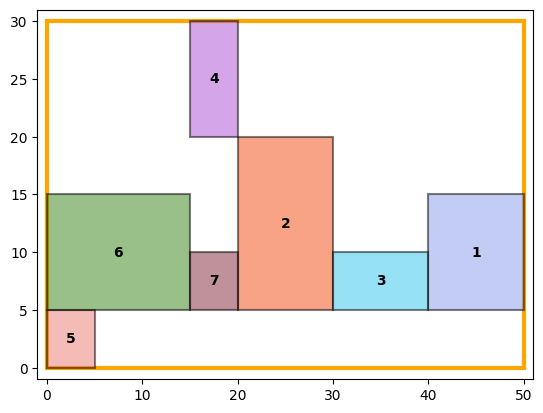

['5', '6', '7', 'H', 'V', '3', 'V', '4', '2', 'V', '1', 'V', 'H']
Cost= 778.125


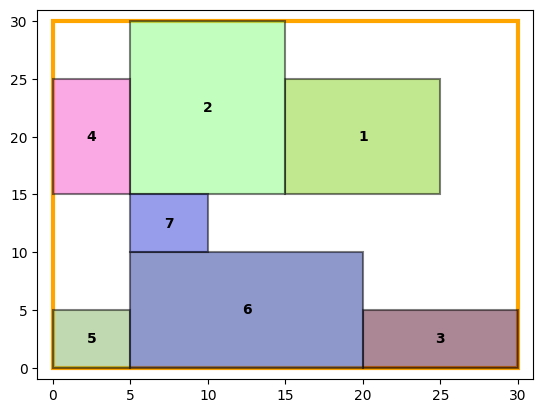

['5', '6', '7', '2', 'V', '3', 'V', '4', 'H', 'V', '1', 'V', 'H']
Cost= 1253.125


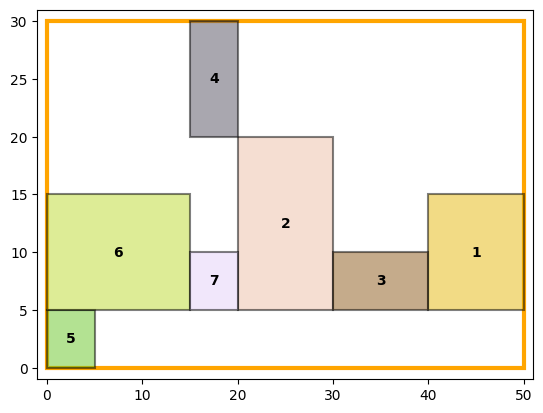

['5', '6', 'H', '2', 'V', '3', 'V', '4', '7', 'V', '1', 'V', 'H']
Cost= 760.625


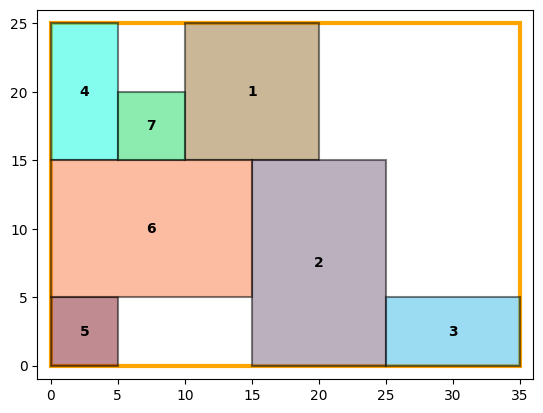

['5', '6', '4', '2', 'V', '3', 'V', 'H', '7', 'V', '1', 'V', 'H']
Cost= 1008.125


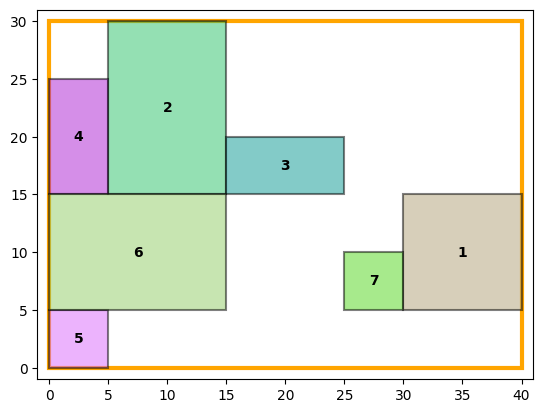

['5', '6', '4', '2', 'V', '3', 'H', 'V', '7', 'V', '1', 'V', 'H']
Cost= 955.625


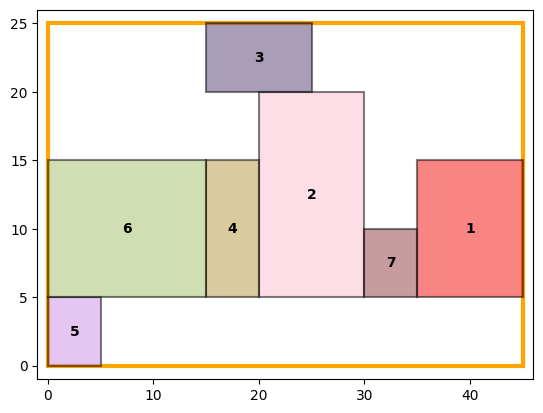

['5', '6', '4', '2', 'V', '3', 'H', 'V', '1', 'V', '7', 'V', 'H']
Cost= 946.875


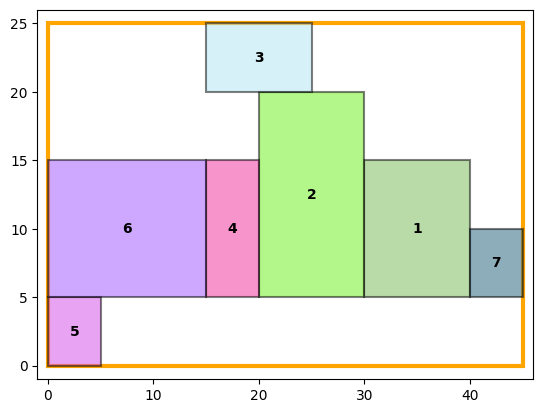

['5', '6', '4', 'V', '2', '3', 'H', 'V', '1', 'V', '7', 'V', 'H']
Cost= 946.875


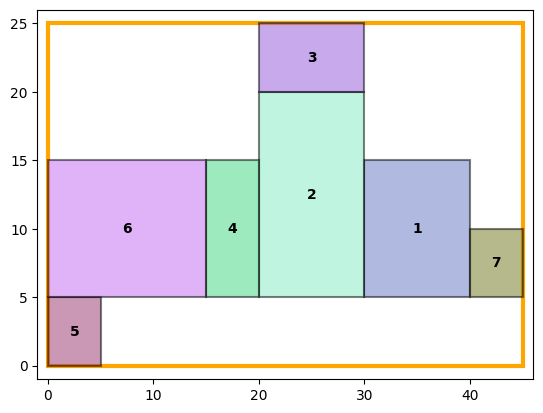

Best Cost After SA is =  603.125
Final Polish:  ['6', '3', '5', 'H', '2', 'H', '1', '7', '4', 'V', 'H', 'V', 'H']
Best Layout


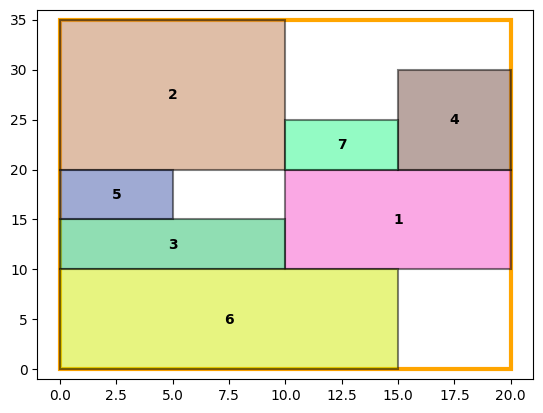

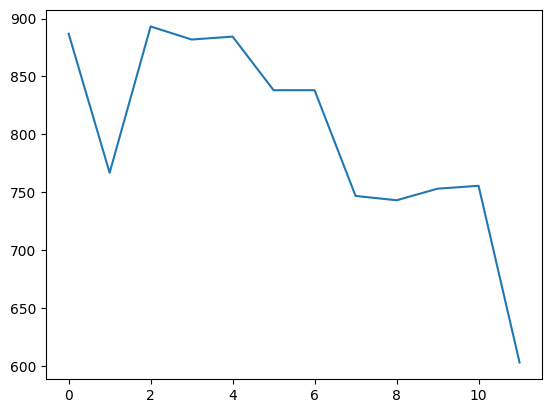

In [12]:
'''
Function to perform Simulated Annealing for Floorplanning
Uses the simulated annealing algorithm to perturb the inital placement by using the moves functions and computes cost for the placement each time
Cost is accepted even if its higher than initial cost in order to attain global minima(i.e minimal cost)
input:initial placement, initial polish expression
output:The best cost and the best placement
Variables used:
inital_temp: Set to 100
final_temp: Set to 1 (condition to terminate the algorithm)
a:cooling rate alpha, set to 0.95
'''
def simulated_annealing(tiles2,polish_expr,ini_cost):
  initial_temp=100
  final_temp=1
  a=0.95
  arr=[]    #Array to store all the cost obtained in each solution
  poli=[]  #Array to store all the Polish expression obtained in each solution
  #ti=[]
  temp=initial_temp
  change=polish_expr.copy()

  #initally best_cost will be the inital cost
  best_cost=ini_cost

  #Utill temperature is greater than final_temp
  while temp>final_temp:
      c=tiles2.copy()
      change=perturb(change)
      final=placement3(c,change)
      new_cost=cost(final[0],final[2],connectivity_matrix)
      print(change)
      print("Cost=",new_cost)
      plot_layout(final[2])


      #compute differnce in cost
      del_cost=new_cost-ini_cost
      if del_cost<0:
        arr.append(new_cost)
        poli.append(change.copy())
        #ti.append(final[2])
        #print(arr)
        #print(poli)
        ini_cost=new_cost

      else:
        r=random.random()
        if(r<np.exp(-del_cost/temp)):
          #accepts cost as best_cost even if its higher in order to obtain global minima
          arr.append(new_cost)
          poli.append(change.copy())
          #ti.append(final[2])
          #print(arr)
          #print(poli)
          ini_cost=new_cost

      #update the temperature
      temp=temp*a

  #Find the global Minimum cost
  z=min(arr)
  x=arr.index(z)
  #print(min(arr),z)
  #print(arr)
  #print(poli)
  #print(x)
  print("Best Cost After SA is = ",arr[x])
  print("Final Polish: ",poli[x])
  best_tiles=placement3(tiles2,poli[x])
  #plot_layout(ti[x])
  print("Best Layout")
  plot_layout(best_tiles[2])
  fig,ax=plt.subplots()
  ax.plot(np.array(range(len(arr))),arr)
  plt.show()
  return tiles2,best_tiles[1],best_tiles[0]
t_cpy=tiles.copy()
print('Initial Cost before SA is = ',ini_cost)
final_plot=simulated_annealing(t_cpy,polish_expr,ini_cost)

In [13]:
'''
A function plot_directed_graph() to plot Polar graphs.
input: Graph object representing nodes and edges.
output: Pictorial representation of graph.
'''
def plot_directed_graph(graph_dict, title):
    # Create a directed graph object
    G = nx.DiGraph()

    # Add nodes and edges from the dictionary representation
    for start_node, edges in graph_dict.items():
        for edge in edges:
            end_node, edge_value_list = edge
            # Add multiple edges between the same pair of nodes
            G.add_edge(start_node, end_node)
            # Set edge attributes
            if isinstance(edge_value_list, list):
                edge_label = ', '.join(str(value) for value in edge_value_list)
            else:
                edge_label = str(edge_value_list)
            G[start_node][end_node]['label'] = edge_label

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrowsize=20)

    # Add edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Display the graph
    plt.title(title)
    plt.show()

In [14]:
# Function to generate Horizontal Polar Graph of the given placement
def HPG (tiles3, covering_blocks):

    # hpg_edges_list stores the width of each covering rectangle as a dictionary "block.rect_ID : width"
    hpg_edges_list = {}

    # prev_ids stores the previusly covered rectangle ids
    prev_ids = []

    # for block for finding the widths of the covering rectangles
    for block in covering_blocks:

        cov_ids = [i.rect_ID for i in covering_blocks[block]]
        cov_ids = set(cov_ids)

        if len(cov_ids) == 2:

            if block.w == covering_blocks[block][0].w + covering_blocks[block][1].w:
                hpg_edges_list[covering_blocks[block][0].rect_ID] = covering_blocks[block][0].w
                hpg_edges_list[covering_blocks[block][1].rect_ID] = covering_blocks[block][1].w

            elif block.w == max(covering_blocks[block][0].w, covering_blocks[block][1].w):
                hpg_edges_list[covering_blocks[block][0].rect_ID] = block.w
                hpg_edges_list[covering_blocks[block][1].rect_ID] = block.w

        elif len(cov_ids) > 2:

            new = None
            prev_width = None

            for ids in prev_ids:

                if ids[0].issubset(cov_ids) and len(cov_ids) - len(ids[0]) == 1:
                    new = cov_ids - ids[0]
                    prev_width = ids[1]
                    break

                elif ( cov_ids - ( cov_ids & ids[0] ) ) in [k[0] for k in prev_ids] and ( cov_ids & ids[0] ) in [k[0] for k in prev_ids]:
                    temp1 = [k for k in prev_ids if k[0] == ( cov_ids - ( cov_ids & ids[0] ) )]
                    temp2 = [k for k in prev_ids if k[0] == ( cov_ids & ids[0] )]

                    if temp1[0][1] + temp2[0][1] != block.w and ( block.w == max( temp1[0][1], temp2[0][1] ) ):

                        if max(temp1[0][1], temp2[0][1]) in [hpg_edges_list[j] for j in temp1[0][0]] and all(ele == max( temp1[0][1], temp2[0][1] ) for ele in temp1[0][0]):
                            for i in temp1[0][0]:
                                if i not in temp2[0][0]:
                                    hpg_edges_list[i] = block.w
                                    temp1[0][1] = block.w
                        elif max(temp1[0][1], temp2[0][1]) in [hpg_edges_list[j] for j in temp2[0][0]] and all(ele == max( temp1[0][1], temp2[0][1] ) for ele in temp2[0][0]):
                            for i in temp2[0][0]:
                                if i not in temp1[0][0]:
                                    hpg_edges_list[i] = block.w
                                    temp2[0][1] = block.w


            if new:
                new_obj = [i for i in covering_blocks[block] if i.rect_ID in new][0]

                if block.w == prev_width:
                    hpg_edges_list[new_obj.rect_ID] = block.w

                elif block.w > prev_width:
                    hpg_edges_list[new_obj.rect_ID] = block.w - prev_width

        prev_ids.append([cov_ids, block.w])



    # Building data structure for HPG

    # start_end_x stores the start and end x coordinates of each covering rectangle as a dictionary "block.rect_ID : [start_x, end_x]"
    start_end_x = {}

    for tile in tiles3:
        start_end_x[tile.rect_ID] = [tile.x1, tile.x1 + hpg_edges_list[tile.rect_ID]]

    # x_coordinates stores the x coordinate values which are the nodes of the HPG
    x_coordinates = []

    # for loop for finding the x coordinates i.e., edges of the HPG
    for tile in tiles3:
        x_coordinates.append(tile.x1 + hpg_edges_list[tile.rect_ID])
        x_coordinates.append(tile.x1)

    x_coordinates = list(set(x_coordinates))
    x_coordinates.sort()

    # hpg stores the HPG as a dictionary "starting_node(i.e., x coordinate value) : [ending_node (i.e., x coordinate value), [edges which between the starting and ending node]]"
    hpg = {}

    for x in x_coordinates:
        endnode_edges = []
        for x_in in x_coordinates:
            if x_in > x:
                for edge in start_end_x:
                    if start_end_x[edge][0] == x and start_end_x[edge][1] == x_in:
                        endnode_edges.append([x_in, edge])
        hpg[x] = endnode_edges

    result = {}
    for key, value in hpg.items():
        merged_value = []
        temp_dict = {}
        for inner_list in value:
            first_elem = inner_list[0]
            if first_elem in temp_dict:
                temp_dict[first_elem].append(inner_list[1])
            else:
                temp_dict[first_elem] = [inner_list[1]]
        for k, v in temp_dict.items():
            if len(v) > 1:
                merged_value.append([k, v])
            else:
                merged_value.append([k, v[0]])
        result[key] = merged_value

    hpg = result

    plot_directed_graph(hpg, "Horizontal Polar Graph (HPG)")
    print("HPG :" , hpg)

    return hpg, x_coordinates

In [15]:
def VPG(tiles4, covering_blocks):
    # vpg_edges_list stores the height of each covering rectangle as a dictionary "block.rect_ID : height"
    vpg_edges_list = {}

    # prev_ids stores the previusly covered rectangle ids
    prev_ids = []

    # for block for finding the heights of the covering rectangles
    for block in covering_blocks:

        cov_ids = [i.rect_ID for i in covering_blocks[block]]
        cov_ids = set(cov_ids)

        if len(cov_ids) == 2:

            if block.h == covering_blocks[block][0].h + covering_blocks[block][1].h:
                vpg_edges_list[covering_blocks[block][0].rect_ID] = covering_blocks[block][0].h
                vpg_edges_list[covering_blocks[block][1].rect_ID] = covering_blocks[block][1].h

            elif block.h == max(covering_blocks[block][0].h, covering_blocks[block][1].h):
                vpg_edges_list[covering_blocks[block][0].rect_ID] = block.h
                vpg_edges_list[covering_blocks[block][1].rect_ID] = block.h

        elif len(cov_ids) > 2:

            new = None
            prev_height = None

            for ids in prev_ids:

                if ids[0].issubset(cov_ids) and len(cov_ids) - len(ids[0]) == 1:
                    new = cov_ids - ids[0]
                    prev_height = ids[1]
                    break

                elif ( cov_ids - ( cov_ids & ids[0] ) ) in [k[0] for k in prev_ids] and ( cov_ids & ids[0] ) in [k[0] for k in prev_ids]:
                    temp1 = [k for k in prev_ids if k[0] == ( cov_ids - ( cov_ids & ids[0] ) )]
                    temp2 = [k for k in prev_ids if k[0] == ( cov_ids & ids[0] )]

                    # print(temp1[0][1])
                    if temp1[0][1] + temp2[0][1] != block.h and ( block.h == max( temp1[0][1], temp2[0][1] ) ):

                        if max( temp1[0][1], temp2[0][1] ) in [vpg_edges_list[j] for j in temp1[0][0]] and all(ele == max( temp1[0][1], temp2[0][1] ) for ele in temp1[0][0]):#
                            for i in temp1[0][0]:
                                if i not in temp2[0][0]:
                                    vpg_edges_list[i] = block.h
                                    temp1[0][1] = block.h
                        elif max( temp1[0][1], temp2[0][1] ) in [vpg_edges_list[j] for j in temp2[0][0]] and all(ele == max( temp1[0][1], temp2[0][1] ) for ele in temp2[0][0]):#
                            for i in temp2[0][0]:
                                if i not in temp1[0][0]:
                                    vpg_edges_list[i] = block.h
                                    temp2[0][1] = block.h

            if new:
                new_obj = [i for i in covering_blocks[block] if i.rect_ID in new][0]

                if block.h == prev_height:
                    vpg_edges_list[new_obj.rect_ID] = block.h

                elif block.h > prev_height:
                    vpg_edges_list[new_obj.rect_ID] = block.h - prev_height

        prev_ids.append([cov_ids, block.h])

    # Building data structure for VPG

    # start_end_y stores the start and end y coordinates of each covering rectangle as a dictionary "block.rect_ID : [start_y, end_y]"
    start_end_y = {}

    for tile in tiles4:
        start_end_y[tile.rect_ID] = [tile.y1, tile.y1 + vpg_edges_list[tile.rect_ID]]

    # y_coordinates stores the y coordinate values which are the nodes of the VPG
    y_coordinates = []

    # for loop for finding the y coordinates i.e., edges of the VPG
    for tile in tiles4:
        y_coordinates.append(tile.y1 + vpg_edges_list[tile.rect_ID])
        y_coordinates.append(tile.y1)

    y_coordinates = list(set(y_coordinates))
    y_coordinates.sort()

    # vpg stores the VPG as a dictionary "starting_node(i.e., y coordinate value) : [ending_node (i.e., y coordinate value), [edges which between the starting and ending node]]"
    vpg = {}

    for y in y_coordinates:
        endnode_edges = []
        for y_in in y_coordinates:
            if y_in > y:
                for edge in start_end_y:
                    if start_end_y[edge][0] == y and start_end_y[edge][1] == y_in:
                        endnode_edges.append([y_in, edge])
        vpg[y] = endnode_edges

    result = {}
    for key, value in vpg.items():
        merged_value = []
        temp_dict = {}
        for inner_list in value:
            first_elem = inner_list[0]
            if first_elem in temp_dict:
                temp_dict[first_elem].append(inner_list[1])
            else:
                temp_dict[first_elem] = [inner_list[1]]
        for k, v in temp_dict.items():
            if len(v) > 1:
                merged_value.append([k, v])
            else:
                merged_value.append([k, v[0]])
        result[key] = merged_value

    vpg = result

    plot_directed_graph(vpg, "Vertical Polar Graph (VPG)")
    print("VPG :", vpg)

    return vpg, y_coordinates

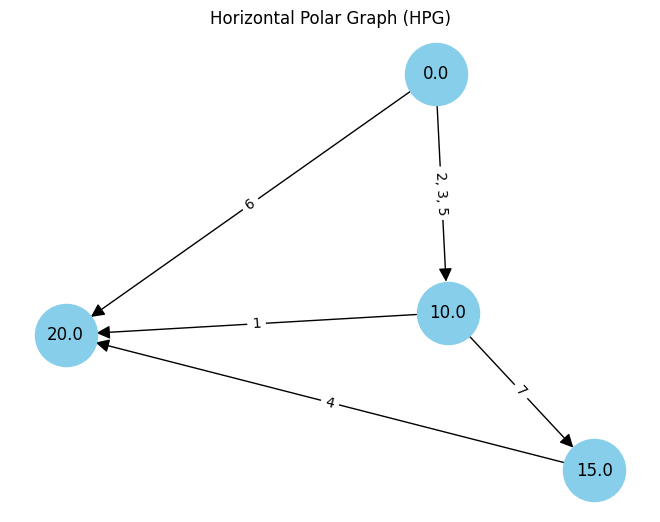

HPG : {0.0: [[10.0, [2, 3, 5]], [20.0, 6]], 10.0: [[15.0, 7], [20.0, 1]], 15.0: [[20.0, 4]], 20.0: []}


In [16]:
graph_dict_hpg, x_values = HPG(final_plot[0],final_plot[1])

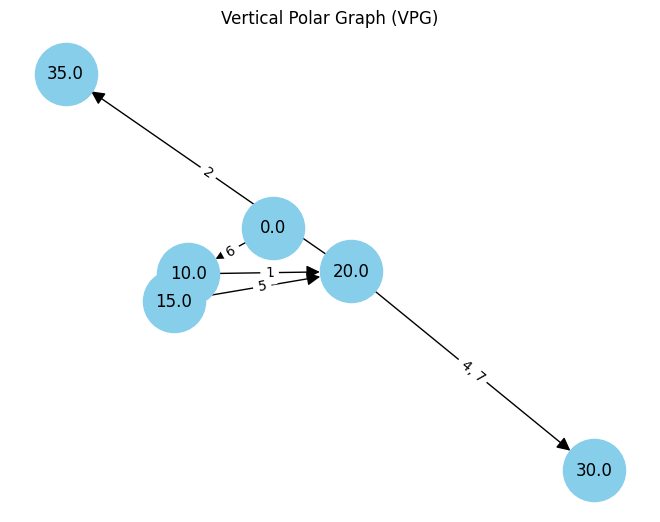

VPG : {0.0: [[10.0, 6]], 10.0: [[15.0, 3], [20.0, 1]], 15.0: [[20.0, 5]], 20.0: [[30.0, [4, 7]], [35.0, 2]], 30.0: [], 35.0: []}


In [17]:
graph_dict_vpg, y_values = VPG(final_plot[0],final_plot[1])

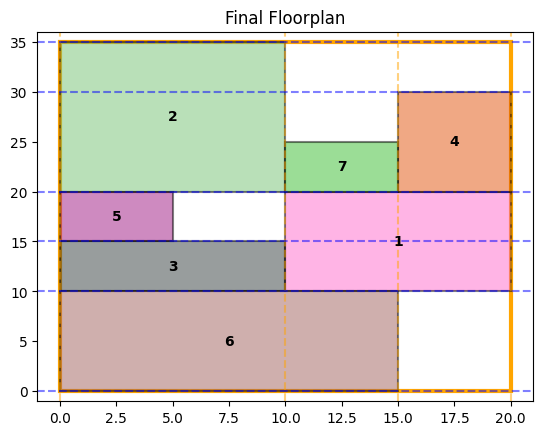

In [18]:
plot_layout(final_plot[0],"Final Floorplan",x_list=x_values,y_list=y_values)